In [1]:
import pandas as pd
import numpy as np

In [4]:
# Load the datasets with actual file paths
sales = pd.read_csv('D:/sparkhathon/M5_Model/sales_train_validation.csv')  # Update this path
prices = pd.read_csv('D:/sparkhathon/M5_Model/sell_prices.csv')          # Update this path
calendar = pd.read_csv('D:/sparkhathon/M5_Model/calendar.csv')            # Update this path

In [5]:
# Verify original columns
print("Original Sales Columns:", sales.columns.tolist())
print("Original Prices Columns:", prices.columns.tolist())
print("Original Calendar Columns:", calendar.columns.tolist())

Original Sales Columns: ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', '

In [8]:
# Define columns to keep
sales_cols = ['item_id', 'dept_id', 'store_id', 'state_id'] + [col for col in sales.columns if col.startswith('d_')]
prices_cols = ['item_id', 'store_id', 'wm_yr_wk', 'sell_price']
calendar_cols = ['date', 'wm_yr_wk', 'event_name_1']  # Exclude 'd' for now

# Subset datasets
sales = sales[sales_cols].copy()
prices = prices[prices_cols].copy()
calendar = calendar[calendar_cols].copy()

# Add 'd' column to calendar based on the full range of days (1,969)
d_values = [f'd_{i}' for i in range(1, 1970)]  # Create list of d_1 to d_1969 to match 1,969 rows
calendar['d'] = d_values  # Assign as a new column

# Verify column selection
print("\nSelected Sales Columns:", sales.columns.tolist())
print("Selected Prices Columns:", prices.columns.tolist())
print("Selected Calendar Columns:", calendar.columns.tolist())
print("Length of calendar:", len(calendar))


Selected Sales Columns: ['item_id', 'dept_id', 'store_id', 'state_id', 'd_1', 'd_2', 'd_3', 'd_4', 'd_5', 'd_6', 'd_7', 'd_8', 'd_9', 'd_10', 'd_11', 'd_12', 'd_13', 'd_14', 'd_15', 'd_16', 'd_17', 'd_18', 'd_19', 'd_20', 'd_21', 'd_22', 'd_23', 'd_24', 'd_25', 'd_26', 'd_27', 'd_28', 'd_29', 'd_30', 'd_31', 'd_32', 'd_33', 'd_34', 'd_35', 'd_36', 'd_37', 'd_38', 'd_39', 'd_40', 'd_41', 'd_42', 'd_43', 'd_44', 'd_45', 'd_46', 'd_47', 'd_48', 'd_49', 'd_50', 'd_51', 'd_52', 'd_53', 'd_54', 'd_55', 'd_56', 'd_57', 'd_58', 'd_59', 'd_60', 'd_61', 'd_62', 'd_63', 'd_64', 'd_65', 'd_66', 'd_67', 'd_68', 'd_69', 'd_70', 'd_71', 'd_72', 'd_73', 'd_74', 'd_75', 'd_76', 'd_77', 'd_78', 'd_79', 'd_80', 'd_81', 'd_82', 'd_83', 'd_84', 'd_85', 'd_86', 'd_87', 'd_88', 'd_89', 'd_90', 'd_91', 'd_92', 'd_93', 'd_94', 'd_95', 'd_96', 'd_97', 'd_98', 'd_99', 'd_100', 'd_101', 'd_102', 'd_103', 'd_104', 'd_105', 'd_106', 'd_107', 'd_108', 'd_109', 'd_110', 'd_111', 'd_112', 'd_113', 'd_114', 'd_115', '

In [9]:
# Remove rows with missing sell_price
prices = prices.dropna(subset=['sell_price'])

# Filter to FOODS category
sales = sales[sales['dept_id'].str.startswith('FOODS')]
print("Unique dept_id values after filtering:", sales['dept_id'].unique())  # Should show ['FOODS_1' 'FOODS_2' 'FOODS_3']

# Convert d_* columns to numeric
sales.iloc[:, 5:] = sales.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')
print("\nData types of d_* columns:", sales.dtypes[5:10])

# Melt sales data to long format
melted_sales = pd.melt(sales, id_vars=['item_id', 'dept_id', 'store_id', 'state_id'], 
                       var_name='d', value_name='sales')
print("\nShape after melting:", melted_sales.shape)

# Handle sales column and filter zeros
melted_sales['sales'] = pd.to_numeric(melted_sales['sales'], errors='coerce')
melted_sales = melted_sales.dropna(subset=['sales'])
melted_sales = melted_sales[melted_sales['sales'] > 0]
print("Shape after removing NaN and zero sales:", melted_sales.shape)

# Fill missing event_name_1
calendar['event_name_1'] = calendar['event_name_1'].fillna('NoEvent')

# Merge with calendar
merged_sales = pd.merge(melted_sales, calendar, on='d', how='left')
print("\nMerged Sales Shape:", merged_sales.shape)
print("Columns in Merged Sales:", merged_sales.columns.tolist())

Unique dept_id values after filtering: ['FOODS_1' 'FOODS_2' 'FOODS_3']

Data types of d_* columns: d_2    int64
d_3    int64
d_4    int64
d_5    int64
d_6    int64
dtype: object

Shape after melting: (27489810, 6)
Shape after removing NaN and zero sales: (10440299, 6)

Merged Sales Shape: (10440299, 9)
Columns in Merged Sales: ['item_id', 'dept_id', 'store_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'event_name_1']


In [10]:
# Merge with prices using optimized keys
final = pd.merge(merged_sales, prices, on=['item_id', 'store_id', 'wm_yr_wk'], how='left', suffixes=('_sales', '_price'))

# Fill or drop missing sell_price
final['sell_price'] = final.groupby(['dept_id', 'store_id'])['sell_price'].transform(lambda x: x.fillna(x.mean()))
final = final.dropna(subset=['sell_price'])

# Drop duplicate columns
final = final.loc[:, ~final.columns.duplicated(keep='first')]

# Verify
print("\nFinal DataFrame Shape:", final.shape)
print("Columns in Final:", final.columns.tolist())
print("Missing Values in Final:", final.isnull().sum())

# Save cleaned data
final.to_csv('cleaned_m5_data.csv', index=False)
print("Cleaned data saved as 'cleaned_m5_data.csv'")


Final DataFrame Shape: (10440299, 10)
Columns in Final: ['item_id', 'dept_id', 'store_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'event_name_1', 'sell_price']
Missing Values in Final: item_id         0
dept_id         0
store_id        0
state_id        0
d               0
sales           0
date            0
wm_yr_wk        0
event_name_1    0
sell_price      0
dtype: int64
Cleaned data saved as 'cleaned_m5_data.csv'


In [11]:
import pandas as pd
import numpy as np

In [12]:
import pandas as pd
import numpy as np

# 1. Load the cleaned data
try:
    final = pd.read_csv('cleaned_m5_data.csv')
    print("Successfully loaded cleaned_m5_data.csv. Shape:", final.shape)
except FileNotFoundError:
    print("Error: cleaned_m5_data.csv not found. Please ensure it exists in the current directory.")
    raise
except Exception as e:
    print(f"Error loading cleaned_m5_data.csv: {e}")
    raise

Successfully loaded cleaned_m5_data.csv. Shape: (10440299, 10)


In [13]:
# 2. Convert date to datetime and extract features
final['date'] = pd.to_datetime(final['date'], errors='coerce')
final['year'] = final['date'].dt.year
final['month'] = final['date'].dt.month
final['day'] = final['date'].dt.day
final['day_of_week'] = final['date'].dt.dayofweek
print("Date conversion and feature extraction completed. NaN dates:", final['date'].isna().sum())

Date conversion and feature extraction completed. NaN dates: 0


In [14]:
# 3. Define Categories
category_mapping = {'FOODS_1': 'food_1', 'FOODS_2': 'food_2', 'FOODS_3': 'food_3'}
final['category'] = final['dept_id'].map(category_mapping)
print("Category mapping applied. Unique categories:", final['category'].unique())

Category mapping applied. Unique categories: ['food_1' 'food_2' 'food_3']


In [16]:
# 4. Define shelf life and calculate expiry date
shelf_life = {
    'food_1': pd.Timedelta(days=14),  # Dairy: 14 days
    'food_2': pd.Timedelta(days=7),   # Meat: 7 days
    'food_3': pd.Timedelta(days=30)   # Produce/Frozen: 30 days (default for fresh)
}
final['expiry_date'] = final.apply(lambda x: x['date'] + shelf_life[x['category']], axis=1)
final['days_to_expiry'] = (final['expiry_date'] - final['date']).dt.days
if (final['days_to_expiry'] < 0).any():
    print("Warning: Negative days_to_expiry detected. Setting to 0 for affected rows.")
    final.loc[final['days_to_expiry'] < 0, 'days_to_expiry'] = 0
print("Expiry dates calculated. Sample days_to_expiry:", final['days_to_expiry'].head())

Expiry dates calculated. Sample days_to_expiry: 0    14
1    14
2    14
3    14
4    14
Name: days_to_expiry, dtype: int64


In [18]:
# 5. Sales-related features (moved up to define sales_lag_1 first)
final['sales_lag_1'] = final.groupby(['item_id', 'store_id'])['sales'].shift(1)
final['sales_rolling_mean_7'] = final.groupby(['item_id', 'store_id'])['sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
final['stock_turnover'] = final['sales_rolling_mean_7'] / final['sales'].mean()

In [19]:
# 6. Price-related features
final['price_lag_1'] = final.groupby(['item_id', 'store_id'])['sell_price'].shift(1)
final['price_diff'] = final['sell_price'] - final['price_lag_1']
final['price_trend'] = final.groupby(['item_id', 'store_id'])['price_diff'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
final['price_elasticity'] = np.where(final['price_diff'] != 0, 
                                    (final['sales'] - final['sales_lag_1']) / final['price_diff'], 
                                    0)

In [20]:
# 7. Event and promo impact
final['has_event'] = final['event_name_1'].apply(lambda x: 0 if x == 'NoEvent' else 1)
final['promo_impact'] = final['has_event'] * final['price_diff'].abs()

In [21]:
# 8. Handle missing values
final['price_lag_1'] = final['price_lag_1'].fillna(final['sell_price'])
final['sales_lag_1'] = final['sales_lag_1'].fillna(final['sales'])
print("Missing values handled. Final NaN count:", final.isnull().sum().sum())

Missing values handled. Final NaN count: 57480


In [22]:
# 9. Verify
print("\n=== Feature Engineering Output ===")
print("Shape:", final.shape)
print("Columns:", final.columns.tolist())
print("Sample Data:", final[['category', 'expiry_date', 'days_to_expiry', 'price_elasticity', 'promo_impact']].head())


=== Feature Engineering Output ===
Shape: (10440299, 26)
Columns: ['item_id', 'dept_id', 'store_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'event_name_1', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'category', 'expiry_date', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact']
Sample Data:   category expiry_date  days_to_expiry  price_elasticity  promo_impact
0   food_1  2011-02-12              14               NaN           NaN
1   food_1  2011-02-12              14               NaN           NaN
2   food_1  2011-02-12              14               NaN           NaN
3   food_1  2011-02-12              14               NaN           NaN
4   food_1  2011-02-12              14               NaN           NaN


In [23]:
# Save the engineered dataset
try:
    final.to_csv('engineered_m5_data_with_shelf_life.csv', index=False)
    print("Engineered data saved successfully as 'engineered_m5_data_with_shelf_life.csv'")
except Exception as e:
    print(f"Error saving file: {e}")
    raise

Engineered data saved successfully as 'engineered_m5_data_with_shelf_life.csv'


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [25]:
# 1. Load the engineered data
try:
    final = pd.read_csv('engineered_m5_data_with_shelf_life.csv')
    print("Successfully loaded engineered_m5_data_with_shelf_life.csv. Shape:", final.shape)
except FileNotFoundError:
    print("Error: engineered_m5_data_with_shelf_life.csv not found. Please ensure it was created in Step 2.")
    raise
except Exception as e:
    print(f"Error loading engineered_m5_data_with_shelf_life.csv: {e}")
    raise

Successfully loaded engineered_m5_data_with_shelf_life.csv. Shape: (10440299, 26)


In [26]:
# 2. Convert dates back to datetime for validation
final['date'] = pd.to_datetime(final['date'], errors='coerce')
final['expiry_date'] = pd.to_datetime(final['expiry_date'], errors='coerce')

In [27]:
# 3. Validate days_to_expiry
final['days_to_expiry'] = (final['expiry_date'] - final['date']).dt.days
if (final['days_to_expiry'] < 0).any():
    print("Warning: Negative days_to_expiry detected. Setting to 0 for affected rows.")
    final.loc[final['days_to_expiry'] < 0, 'days_to_expiry'] = 0
print("Days to expiry validated. Sample days_to_expiry:", final['days_to_expiry'].head())

Days to expiry validated. Sample days_to_expiry: 0    14
1    14
2    14
3    14
4    14
Name: days_to_expiry, dtype: int64


In [28]:
# 4. Split data by category
data_by_category = {cat: final[final['category'] == cat].copy() for cat in ['food_1', 'food_2', 'food_3']}

In [31]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('engineered_m5_data_with_shelf_life.csv')

# Check data types
print("Data Types:\n", data.dtypes)

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check unique departments
print("\nUnique dept_id values:", data['dept_id'].unique())

# Sample data for each department
for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    dept_data = data[data['dept_id'] == dept]
    print(f"\nShape of {dept} data: {dept_data.shape}")
    print(f"Sample {dept} data:\n", dept_data.head())

Data Types:
 item_id                  object
dept_id                  object
store_id                 object
state_id                 object
d                        object
sales                     int64
date                     object
wm_yr_wk                  int64
event_name_1             object
sell_price              float64
year                      int64
month                     int64
day                       int64
day_of_week               int64
category                 object
expiry_date              object
days_to_expiry            int64
price_lag_1             float64
price_diff              float64
price_trend             float64
sales_lag_1             float64
sales_rolling_mean_7    float64
stock_turnover          float64
price_elasticity        float64
has_event                 int64
promo_impact            float64
dtype: object

Missing Values:
 item_id                     0
dept_id                     0
store_id                    0
state_id                    0
d  

In [32]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('engineered_m5_data_with_shelf_life.csv')
data['date'] = pd.to_datetime(data['date'])

# Handle missing values
data['price_diff'] = data['price_diff'].fillna(0)  # No change for first row
data['price_trend'] = data['price_trend'].fillna(0)
data['price_elasticity'] = data['price_elasticity'].fillna(data['price_elasticity'].mean())
data['promo_impact'] = data['promo_impact'].fillna(0)

# Verify no missing values in critical features
print("Missing Values After Handling:\n", data.isnull().sum())

# Ensure one-hot encoding for categorical variables (if not already done)
if not any(col.startswith('dept_') for col in data.columns):
    data = pd.get_dummies(data, columns=['dept_id', 'store_id', 'state_id'], prefix=['dept', 'store', 'state'])

# Save cleaned data
data.to_csv('cleaned_engineered_m5_data.csv', index=False)

Missing Values After Handling:
 item_id                 0
dept_id                 0
store_id                0
state_id                0
d                       0
sales                   0
date                    0
wm_yr_wk                0
event_name_1            0
sell_price              0
year                    0
month                   0
day                     0
day_of_week             0
category                0
expiry_date             0
days_to_expiry          0
price_lag_1             0
price_diff              0
price_trend             0
sales_lag_1             0
sales_rolling_mean_7    0
stock_turnover          0
price_elasticity        0
has_event               0
promo_impact            0
dtype: int64


In [33]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
data = pd.read_csv('cleaned_engineered_m5_data.csv')
data['date'] = pd.to_datetime(data['date'])

# Check data types and confirm one-hot encoding
print("Data Types:\n", data.dtypes)
print("\nShape:", data.shape)
print("\nUnique dept_id values:", data['dept_id'].unique() if 'dept_id' in data.columns else "dept_id already encoded")

Data Types:
 item_id                         object
dept_id                         object
store_id                        object
state_id                        object
d                               object
sales                            int64
date                    datetime64[ns]
wm_yr_wk                         int64
event_name_1                    object
sell_price                     float64
year                             int64
month                            int64
day                              int64
day_of_week                      int64
category                        object
expiry_date                     object
days_to_expiry                   int64
price_lag_1                    float64
price_diff                     float64
price_trend                    float64
sales_lag_1                    float64
sales_rolling_mean_7           float64
stock_turnover                 float64
price_elasticity               float64
has_event                        int64
promo_impact

In [34]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
data = pd.read_csv('cleaned_engineered_m5_data.csv')
data['date'] = pd.to_datetime(data['date'])

# Apply one-hot encoding
data = pd.get_dummies(data, columns=['dept_id', 'store_id', 'state_id'], prefix=['dept', 'store', 'state'])

# Verify data types and shape
print("Data Types After Encoding:\n", data.dtypes)
print("\nShape:", data.shape)
print("\nColumns:", data.columns.tolist())

# Save encoded dataset
data.to_csv('encoded_m5_data.csv', index=False)

Data Types After Encoding:
 item_id                         object
d                               object
sales                            int64
date                    datetime64[ns]
wm_yr_wk                         int64
event_name_1                    object
sell_price                     float64
year                             int64
month                            int64
day                              int64
day_of_week                      int64
category                        object
expiry_date                     object
days_to_expiry                   int64
price_lag_1                    float64
price_diff                     float64
price_trend                    float64
sales_lag_1                    float64
sales_rolling_mean_7           float64
stock_turnover                 float64
price_elasticity               float64
has_event                        int64
promo_impact                   float64
dept_FOODS_1                      bool
dept_FOODS_2                      bo

In [35]:
import pandas as pd
import numpy as np

# Load the encoded dataset
data = pd.read_csv('encoded_m5_data.csv')
data['date'] = pd.to_datetime(data['date'])

# Convert bool columns to uint8
bool_cols = [col for col in data.columns if data[col].dtype == 'bool']
data[bool_cols] = data[bool_cols].astype('uint8')

# Verify data types and shape
print("Data Types After Conversion:\n", data.dtypes)
print("\nShape:", data.shape)
print("\nColumns:", data.columns.tolist())

# Save corrected dataset
data.to_csv('corrected_encoded_m5_data.csv', index=False)

Data Types After Conversion:
 item_id                         object
d                               object
sales                            int64
date                    datetime64[ns]
wm_yr_wk                         int64
event_name_1                    object
sell_price                     float64
year                             int64
month                            int64
day                              int64
day_of_week                      int64
category                        object
expiry_date                     object
days_to_expiry                   int64
price_lag_1                    float64
price_diff                     float64
price_trend                    float64
sales_lag_1                    float64
sales_rolling_mean_7           float64
stock_turnover                 float64
price_elasticity               float64
has_event                        int64
promo_impact                   float64
dept_FOODS_1                     uint8
dept_FOODS_2                     u

In [37]:
import pandas as pd
import numpy as np

# Load the encoded dataset
data = pd.read_csv('corrected_encoded_m5_data.csv')
data['date'] = pd.to_datetime(data['date'])

# Add week_of_year
data['week_of_year'] = data['date'].apply(lambda x: x.isocalendar().week)

# Verify the new column
print("Data Types After Adding week_of_year:\n", data.dtypes)
print("\nShape:", data.shape)
print("\nSample week_of_year values:", data['week_of_year'].head())

Data Types After Adding week_of_year:
 item_id                         object
d                               object
sales                            int64
date                    datetime64[ns]
wm_yr_wk                         int64
event_name_1                    object
sell_price                     float64
year                             int64
month                            int64
day                              int64
day_of_week                      int64
category                        object
expiry_date                     object
days_to_expiry                   int64
price_lag_1                    float64
price_diff                     float64
price_trend                    float64
sales_lag_1                    float64
sales_rolling_mean_7           float64
stock_turnover                 float64
price_elasticity               float64
has_event                        int64
promo_impact                   float64
dept_FOODS_1                     int64
dept_FOODS_2             

In [39]:
import pandas as pd
import numpy as np

# Define data types to reduce memory usage
dtypes = {
    'sales': 'int32',
    'wm_yr_wk': 'int32',
    'sell_price': 'float32',
    'year': 'int32',
    'month': 'int32',
    'day': 'int32',
    'day_of_week': 'int32',
    'days_to_expiry': 'int32',
    'price_lag_1': 'float32',
    'price_diff': 'float32',
    'price_trend': 'float32',
    'sales_lag_1': 'float32',
    'sales_rolling_mean_7': 'float32',
    'stock_turnover': 'float32',
    'price_elasticity': 'float32',
    'has_event': 'int8',
    'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8',
    'dept_FOODS_2': 'uint8',
    'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8',
    'store_CA_2': 'uint8',
    'store_CA_3': 'uint8',
    'store_CA_4': 'uint8',
    'store_TX_1': 'uint8',
    'store_TX_2': 'uint8',
    'store_TX_3': 'uint8',
    'store_WI_1': 'uint8',
    'store_WI_2': 'uint8',
    'store_WI_3': 'uint8',
    'state_CA': 'uint8',
    'state_TX': 'uint8',
    'state_WI': 'uint8',
    'week_of_year': 'int32'
}

# Load dataset in chunks and verify date range
chunksize = 1_000_000
chunks = []
for chunk in pd.read_csv('corrected_encoded_m5_data.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date']):
    # Add week_of_year if not already present
    chunk['week_of_year'] = chunk['date'].apply(lambda x: x.isocalendar().week).astype('int32')
    chunks.append(chunk)

# Concatenate chunks
data = pd.concat(chunks, ignore_index=True)

# Verify date range and week_of_year
print("Date Range:", data['date'].min(), "to", data['date'].max())
print("Week of Year Distribution:\n", data['week_of_year'].value_counts().sort_index())
print("Sample week_of_year values:", data['week_of_year'].head())
print("Data Types:\n", data.dtypes)
print("Shape:", data.shape)

# Save corrected dataset
data.to_csv('corrected_encoded_m5_data_v2.csv', index=False)

Date Range: 2011-01-29 00:00:00 to 2016-04-24 00:00:00
Week of Year Distribution:
 week_of_year
1     196772
2     204934
3     201490
4     203724
5     226930
6     237075
7     234130
8     226138
9     231788
10    236425
11    235201
12    227990
13    227863
14    239202
15    237329
16    231388
17    174691
18    182041
19    185020
20    184942
21    177658
22    182778
23    192519
24    191622
25    185826
26    181110
27    188562
28    193403
29    186841
30    181327
31    186142
32    192636
33    190994
34    185958
35    185371
36    196374
37    199429
38    193487
39    192041
40    199859
41    202449
42    195400
43    188759
44    192658
45    201046
46    198826
47    185551
48    178158
49    199466
50    197740
51    186202
52    159576
53     45458
Name: count, dtype: int64
Sample week_of_year values: 0    4
1    4
2    4
3    4
4    4
Name: week_of_year, dtype: int32
Data Types:
 item_id                         object
d                               object
sa

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Define data types (from previous step)
dtypes = {
    'sales': 'int32',
    'wm_yr_wk': 'int32',
    'sell_price': 'float32',
    'year': 'int32',
    'month': 'int32',
    'day': 'int32',
    'day_of_week': 'int32',
    'days_to_expiry': 'int32',
    'price_lag_1': 'float32',
    'price_diff': 'float32',
    'price_trend': 'float32',
    'sales_lag_1': 'float32',
    'sales_rolling_mean_7': 'float32',
    'stock_turnover': 'float32',
    'price_elasticity': 'float32',
    'has_event': 'int8',
    'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8',
    'dept_FOODS_2': 'uint8',
    'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8',
    'store_CA_2': 'uint8',
    'store_CA_3': 'uint8',
    'store_CA_4': 'uint8',
    'store_TX_1': 'uint8',
    'store_TX_2': 'uint8',
    'store_TX_3': 'uint8',
    'store_WI_1': 'uint8',
    'store_WI_2': 'uint8',
    'store_WI_3': 'uint8',
    'state_CA': 'uint8',
    'state_TX': 'uint8',
    'state_WI': 'uint8',
    'week_of_year': 'int32'
}

# Process in chunks
chunksize = 1_000_000
chunks = []
for chunk in pd.read_csv('corrected_encoded_m5_data_v2.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date']):
    # Calculate days_since_first_sale
    chunk['first_sale_date'] = chunk.groupby('item_id')['date'].transform('min')
    chunk['days_since_first_sale'] = (chunk['date'] - chunk['first_sale_date']).dt.days.astype('int32')
    
    # Add polynomial feature
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(chunk[['days_to_expiry']])
    chunk['days_to_expiry_squared'] = poly_features[:, 1].astype('float32')
    
    # Add interaction term
    chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
    
    chunks.append(chunk)

# Concatenate chunks
data = pd.concat(chunks, ignore_index=True)

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week',
    'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity'
] + [col for col in data.columns if col.startswith('dept_') or col.startswith('store_') or col.startswith('state_')]

# Ensure numeric features and drop NaNs
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=features + ['sell_price'])

# Save enhanced dataset
data.to_csv('enhanced_m5_data.csv', index=False)
print("Enhanced Data Shape:", data.shape)
print("Features:", features)

Enhanced Data Shape: (10440299, 44)
Features: ['days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'expiry_price_elasticity', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI']


In [42]:
import pandas as pd
import numpy as np

# Define data types
dtypes = {
    'sales': 'int32',
    'wm_yr_wk': 'int32',
    'sell_price': 'float32',
    'year': 'int32',
    'month': 'int32',
    'day': 'int32',
    'day_of_week': 'int32',
    'days_to_expiry': 'int32',
    'price_lag_1': 'float32',
    'price_diff': 'float32',
    'price_trend': 'float32',
    'sales_lag_1': 'float32',
    'sales_rolling_mean_7': 'float32',
    'stock_turnover': 'float32',
    'price_elasticity': 'float32',
    'has_event': 'int8',
    'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8',
    'dept_FOODS_2': 'uint8',
    'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8',
    'store_CA_2': 'uint8',
    'store_CA_3': 'uint8',
    'store_CA_4': 'uint8',
    'store_TX_1': 'uint8',
    'store_TX_2': 'uint8',
    'store_TX_3': 'uint8',
    'store_WI_1': 'uint8',
    'store_WI_2': 'uint8',
    'store_WI_3': 'uint8',
    'state_CA': 'uint8',
    'state_TX': 'uint8',
    'state_WI': 'uint8',
    'week_of_year': 'int32',
    'days_since_first_sale': 'int32',
    'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Load and clean dataset in chunks
chunksize = 1_000_000
chunks = []
drop_columns = ['item_id', 'd', 'event_name_1', 'category', 'expiry_date', 'first_sale_date']
for chunk in pd.read_csv('enhanced_m5_data.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date']):
    chunk = chunk.drop(columns=[col for col in drop_columns if col in chunk.columns])
    chunks.append(chunk)

# Concatenate chunks
data = pd.concat(chunks, ignore_index=True)

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week',
    'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
    'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4',
    'store_TX_1', 'store_TX_2', 'store_TX_3',
    'store_WI_1', 'store_WI_2', 'store_WI_3',
    'state_CA', 'state_TX', 'state_WI'
]

# Ensure numeric features and drop NaNs
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=features + ['sell_price'])

# Save corrected dataset
data.to_csv('corrected_enhanced_m5_data.csv', index=False)
print("Corrected Data Shape:", data.shape)
print("Columns:", data.columns.tolist())

Corrected Data Shape: (10440299, 38)
Columns: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'expiry_price_elasticity']


In [43]:
import pandas as pd
import numpy as np

# Define data types
dtypes = {
    'sales': 'int32',
    'wm_yr_wk': 'int32',
    'sell_price': 'float32',
    'year': 'int32',
    'month': 'int32',
    'day': 'int32',
    'day_of_week': 'int32',
    'days_to_expiry': 'int32',
    'price_lag_1': 'float32',
    'price_diff': 'float32',
    'price_trend': 'float32',
    'sales_lag_1': 'float32',
    'sales_rolling_mean_7': 'float32',
    'stock_turnover': 'float32',
    'price_elasticity': 'float32',
    'has_event': 'int8',
    'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8',
    'dept_FOODS_2': 'uint8',
    'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8',
    'store_CA_2': 'uint8',
    'store_CA_3': 'uint8',
    'store_CA_4': 'uint8',
    'store_TX_1': 'uint8',
    'store_TX_2': 'uint8',
    'store_TX_3': 'uint8',
    'store_WI_1': 'uint8',
    'store_WI_2': 'uint8',
    'store_WI_3': 'uint8',
    'state_CA': 'uint8',
    'state_TX': 'uint8',
    'state_WI': 'uint8',
    'week_of_year': 'int32',
    'days_since_first_sale': 'int32',
    'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Load dataset in chunks and verify columns
chunksize = 1_000_000
chunks = []
for chunk in pd.read_csv('corrected_enhanced_m5_data.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date']):
    # Verify one-hot encoded columns
    expected_one_hot = [
        'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
        'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4',
        'store_TX_1', 'store_TX_2', 'store_TX_3',
        'store_WI_1', 'store_WI_2', 'store_WI_3',
        'state_CA', 'state_TX', 'state_WI'
    ]
    missing_cols = [col for col in expected_one_hot if col not in chunk.columns]
    if missing_cols:
        print(f"Missing one-hot columns: {missing_cols}")
    
    chunks.append(chunk)

# Concatenate chunks
data = pd.concat(chunks, ignore_index=True)

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week',
    'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
    'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4',
    'store_TX_1', 'store_TX_2', 'store_TX_3',
    'store_WI_1', 'store_WI_2', 'store_WI_3',
    'state_CA', 'state_TX', 'state_WI'
]

# Ensure numeric features and drop NaNs
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=features + ['sell_price'])

# Save verified dataset
data.to_csv('verified_enhanced_m5_data.csv', index=False)
print("Verified Data Shape:", data.shape)
print("Columns:", data.columns.tolist())

Verified Data Shape: (10440299, 38)
Columns: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'expiry_price_elasticity']


In [45]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 4.4 MB/s eta 0:00:34
    --------------------------------------- 2.4/150.0 MB 4.9 MB/s eta 0:00:30
    --------------------------------------- 3.7/150.0 MB 5.4 MB/s eta 0:00:28
   - -------------------------------------- 5.2/150.0 MB 5.9 MB/s eta 0:00:25
   - -------------------------------------- 7.3/150.0 MB 6.7 MB/s eta 0:00:22
   -- ------------------------------------- 9.7/150.0 MB 7.4 MB/s eta 0:00:19
   --- ------------------------------------ 12.8/150.0 MB 8.6 MB/s eta 0:00:17
   ---- ----------------------------------- 16.8/150.0 MB 9.8 MB/s eta 0:00:14
   ----- ---------------------------------- 21.8/150.0 MB 11.4 MB/s eta 0:00:12
   ------- -------------------------------- 27.0/150.0 MB 12.7 MB/s eta 0:00:10
   --------- ------------------------------ 34.1/150.0 MB 14.7 MB/s eta 

In [46]:
import xgboost
print(xgboost.__version__)

3.0.2


In [47]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define data types (from previous steps)
dtypes = {
    'sales': 'int32',
    'wm_yr_wk': 'int32',
    'sell_price': 'float32',
    'year': 'int32',
    'month': 'int32',
    'day': 'int32',
    'day_of_week': 'int32',
    'days_to_expiry': 'int32',
    'price_lag_1': 'float32',
    'price_diff': 'float32',
    'price_trend': 'float32',
    'sales_lag_1': 'float32',
    'sales_rolling_mean_7': 'float32',
    'stock_turnover': 'float32',
    'price_elasticity': 'float32',
    'has_event': 'int8',
    'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8',
    'dept_FOODS_2': 'uint8',
    'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8',
    'store_CA_2': 'uint8',
    'store_CA_3': 'uint8',
    'store_CA_4': 'uint8',
    'store_TX_1': 'uint8',
    'store_TX_2': 'uint8',
    'store_TX_3': 'uint8',
    'store_WI_1': 'uint8',
    'store_WI_2': 'uint8',
    'store_WI_3': 'uint8',
    'state_CA': 'uint8',
    'state_TX': 'uint8',
    'state_WI': 'uint8',
    'week_of_year': 'int32',
    'days_since_first_sale': 'int32',
    'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week',
    'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
    'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4',
    'store_TX_1', 'store_TX_2', 'store_TX_3',
    'store_WI_1', 'store_WI_2', 'store_WI_3',
    'state_CA', 'state_TX', 'state_WI'
]

# Load verified data in chunks
chunksize = 1_000_000
models = {}
for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    print(f"\nTraining model for {dept}")
    dept_chunks = []
    
    # Filter and process chunks
    for chunk in pd.read_csv('verified_enhanced_m5_data.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date']):
        dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
        if not dept_chunk.empty:
            dept_chunks.append(dept_chunk)
    
    if not dept_chunks:
        print(f"No valid data for {dept} after filtering.")
        continue
    
    # Concatenate department data
    dept_data = pd.concat(dept_chunks, ignore_index=True)
    
    # Time-based split
    dept_data = dept_data.sort_values('date')
    train_end_idx = int(len(dept_data) * 0.8)
    X_train = dept_data[features].iloc[:train_end_idx]
    X_test = dept_data[features].iloc[train_end_idx:]
    y_train = dept_data['sell_price'].iloc[:train_end_idx]
    y_test = dept_data['sell_price'].iloc[train_end_idx:]
    
    # Initialize and train XGBoost model
    model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score for {dept}: {r2:.4f}")
    
    # Feature importance
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    print(f"Top 5 Features for {dept}:\n", importance.head())
    
    models[dept] = model


Training model for FOODS_1
R2 Score for FOODS_1: 0.9979
Top 5 Features for FOODS_1:
         Feature  Importance
9   price_lag_1    0.992931
6          year    0.000797
10   price_diff    0.000761
28   store_WI_2    0.000597
32     state_WI    0.000469

Training model for FOODS_2
R2 Score for FOODS_2: 0.9994
Top 5 Features for FOODS_2:
         Feature  Importance
9   price_lag_1    0.994361
10   price_diff    0.000932
6          year    0.000713
11  price_trend    0.000579
7     has_event    0.000364

Training model for FOODS_3
R2 Score for FOODS_3: 0.9724
Top 5 Features for FOODS_3:
                  Feature  Importance
9            price_lag_1    0.902627
32              state_WI    0.023012
14  sales_rolling_mean_7    0.014173
22            store_CA_3    0.011057
6                   year    0.008942


In [48]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Define data types (from previous steps)
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week',
    'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
    'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2',
    'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI'
]

# Sample data for FOODS_1 to check for overfitting
chunksize = 1_000_000
dept_data = pd.concat([chunk[chunk['dept_FOODS_1'] == 1] for chunk in pd.read_csv('verified_enhanced_m5_data.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date'])])
dept_data = dept_data.sample(frac=0.1, random_state=42)  # 10% sample
X = dept_data[features]
y = dept_data['sell_price']

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = XGBRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8,
        random_state=42, n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

print("Cross-Validation R2 Scores for FOODS_1:", r2_scores)
print("Mean R2 Score:", np.mean(r2_scores))
print("Standard Deviation:", np.std(r2_scores))

# Check distribution of days_to_expiry
print("Days to Expiry Distribution:\n", dept_data['days_to_expiry'].describe())

Cross-Validation R2 Scores for FOODS_1: [0.9990935921669006, 0.9990987777709961, 0.9992725253105164, 0.9993675947189331, 0.9994106888771057]
Mean R2 Score: 0.9992486357688903
Standard Deviation: 0.00013227175807968667
Days to Expiry Distribution:
 count    152069.0
mean         14.0
std           0.0
min          14.0
25%          14.0
50%          14.0
75%          14.0
max          14.0
Name: days_to_expiry, dtype: float64


In [49]:
import pandas as pd
import numpy as np

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define shelf lives by department (approximate, adjust based on data)
dept_shelf_lives = {
    'FOODS_1': 14,  # Dairy, fruits, vegetables (e.g., milk: 7 days, frozen: 180 days)
    'FOODS_2': 5,   # Bakery (e.g., bread: 5 days)
    'FOODS_3': 5    # Meat, seafood (e.g., fish: 3 days, meat: 5 days)
}

# Load and recompute days_to_expiry
chunksize = 1_000_000
chunks = []
for chunk in pd.read_csv('verified_enhanced_m5_data.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date']):
    # Assign shelf life based on department
    chunk['shelf_life'] = chunk.apply(
        lambda x: dept_shelf_lives['FOODS_1'] if x['dept_FOODS_1'] == 1 else
                  dept_shelf_lives['FOODS_2'] if x['dept_FOODS_2'] == 1 else
                  dept_shelf_lives['FOODS_3'], axis=1
    ).astype('int32')
    
    # Simulate expiry_date (date + shelf_life - random offset for variability)
    chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
        chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
    )
    
    # Recalculate days_to_expiry
    chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
    
    # Recalculate derived features
    chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
    chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
    
    # Drop temporary column
    chunk = chunk.drop(columns=['shelf_life', 'expiry_date'])
    chunks.append(chunk)

# Concatenate chunks
data = pd.concat(chunks, ignore_index=True)

# Save corrected dataset
data.to_csv('corrected_expiry_m5_data.csv', index=False)

# Verify days_to_expiry distribution
print("Days to Expiry Distribution (All Data):\n", data['days_to_expiry'].describe())

Days to Expiry Distribution (All Data):
 count    1.044030e+07
mean     3.154877e+00
std      2.780985e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      1.400000e+01
Name: days_to_expiry, dtype: float64


In [52]:
import pandas as pd
import numpy as np

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3,
    'Frozen Vegetables': 180, 'Frozen Fruits': 180, 'Frozen Meat': 180, 'Frozen Meals': 180,
    'Ice Cream': 90
}

# Department to product mapping (simplified, adjust based on item_id if available)
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Butter', 'Yogurt', 'Eggs', 'Tofu',
                'Fresh Fruits', 'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies',
                'Packaged Salads', 'Fresh-Cut Fruits', 'Frozen Vegetables', 'Frozen Fruits',
                'Frozen Meat', 'Frozen Meals', 'Ice Cream'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute days_to_expiry
chunksize = 1_000_000
chunks = []
for chunk in pd.read_csv('verified_enhanced_m5_data.csv', chunksize=chunksize, dtype=dtypes, parse_dates=['date']):
    # Assign shelf life based on department with random product selection
    chunk['shelf_life'] = chunk.apply(
        lambda x: np.random.choice(
            [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                             'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
        ), axis=1
    ).astype('int32')
    
    # Simulate expiry_date
    chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
        chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
    )
    
    # Recalculate days_to_expiry
    chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
    
    # Recalculate derived features
    chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
    chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
    
    # Drop temporary column
    chunk = chunk.drop(columns=['shelf_life', 'expiry_date'])
    chunks.append(chunk)

# Concatenate chunks
data = pd.concat(chunks, ignore_index=True)

# Save corrected dataset
data.to_csv('refined_expiry_m5_data.csv', index=False)

# Verify days_to_expiry distribution
print("Refined Days to Expiry Distribution (All Data):\n", data['days_to_expiry'].describe())

Refined Days to Expiry Distribution (All Data):
 count    1.044030e+07
mean     5.522695e+00
std      1.789996e+01
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.800000e+02
Name: days_to_expiry, dtype: float64


In [54]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3,
    'Frozen Vegetables': 180, 'Frozen Fruits': 180, 'Frozen Meat': 180, 'Frozen Meals': 180,
    'Ice Cream': 90
}

# Partial item_id to product mapping (extend based on dataset)
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_1_016': 'Frozen Vegetables', 'FOODS_1_017': 'Frozen Fruits',
    'FOODS_1_018': 'Frozen Meat', 'FOODS_1_019': 'Frozen Meals', 'FOODS_1_020': 'Ice Cream',
    'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes', 'FOODS_2_003': 'Pastries',
    'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken', 'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood',
    'FOODS_3_005': 'Deli Meats'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Butter', 'Yogurt', 'Eggs', 'Tofu',
                'Fresh Fruits', 'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies',
                'Packaged Salads', 'Fresh-Cut Fruits', 'Frozen Vegetables', 'Frozen Fruits',
                'Frozen Meat', 'Frozen Meals', 'Ice Cream'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute days_to_expiry
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1  # Subtract header
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life using item_id if available, else fallback to department
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Recalculate derived features
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'item_mapped_expiry_m5_data.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify days_to_expiry distribution
    print("Item-Mapped Days to Expiry Distribution (All Data):\n", data['days_to_expiry'].describe())
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

ModuleNotFoundError: No module named 'tqdm'

In [55]:
!pip install tqdm


In [56]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3,
    'Frozen Vegetables': 180, 'Frozen Fruits': 180, 'Frozen Meat': 180, 'Frozen Meals': 180,
    'Ice Cream': 90
}

# Partial item_id to product mapping (extend based on dataset)
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_1_016': 'Frozen Vegetables', 'FOODS_1_017': 'Frozen Fruits',
    'FOODS_1_018': 'Frozen Meat', 'FOODS_1_019': 'Frozen Meals', 'FOODS_1_020': 'Ice Cream',
    'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes', 'FOODS_2_003': 'Pastries',
    'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken', 'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood',
    'FOODS_3_005': 'Deli Meats'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Butter', 'Yogurt', 'Eggs', 'Tofu',
                'Fresh Fruits', 'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies',
                'Packaged Salads', 'Fresh-Cut Fruits', 'Frozen Vegetables', 'Frozen Fruits',
                'Frozen Meat', 'Frozen Meals', 'Ice Cream'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute days_to_expiry
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1  # Subtract header
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life using item_id if available, else fallback to department
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Recalculate derived features
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'item_mapped_expiry_m5_data.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify days_to_expiry distribution
    print("Item-Mapped Days to Expiry Distribution (All Data):\n", data['days_to_expiry'].describe())
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:52<00:00, 15.72s/it]
2025-07-04 00:45:45,612 - INFO - Concatenating chunks
2025-07-04 00:45:46,516 - INFO - Saving dataset to item_mapped_expiry_m5_data.csv


Item-Mapped Days to Expiry Distribution (All Data):
 count    1.044030e+07
mean     5.604744e+00
std      1.814665e+01
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.800000e+02
Name: days_to_expiry, dtype: float64


In [57]:
import pandas as pd
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Verify dataset
try:
    chunk = next(pd.read_csv('item_mapped_expiry_m5_data.csv', chunksize=1000, dtype=dtypes, parse_dates=['date']))
    logging.info(f"Columns in item_mapped_expiry_m5_data.csv: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
except Exception as e:
    logging.error(f"Error reading dataset: {str(e)}")
    raise

2025-07-04 00:53:27,107 - INFO - Columns in item_mapped_expiry_m5_data.csv: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'days_to_expiry_squared', 'expiry_price_elasticity']
2025-07-04 00:53:27,121 - INFO - Sample days_to_expiry distribution:
count    1000.000000
mean        8.035000
std        25.020388
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       180.000000
Name: days_to_expiry, dtype: float64


In [60]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3,
    'Frozen Vegetables': 180, 'Frozen Fruits': 180, 'Frozen Meat': 180, 'Frozen Meals': 180,
    'Ice Cream': 90
}

# Partial item_id to product mapping
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_1_016': 'Frozen Vegetables', 'FOODS_1_017': 'Frozen Fruits',
    'FOODS_1_018': 'Frozen Meat', 'FOODS_1_019': 'Frozen Meals', 'FOODS_1_020': 'Ice Cream',
    'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes', 'FOODS_2_003': 'Pastries',
    'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken', 'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood',
    'FOODS_3_005': 'Deli Meats'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Butter', 'Yogurt', 'Eggs', 'Tofu',
                'Fresh Fruits', 'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies',
                'Packaged Salads', 'Fresh-Cut Fruits', 'Frozen Vegetables', 'Frozen Fruits',
                'Frozen Meat', 'Frozen Meals', 'Ice Cream'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life using item_id if available, else fallback to department
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Compute missing features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        first_sale_date = chunk['date'].min()
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        
        # Recalculate derived features
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample week_of_year distribution:\n{chunk['week_of_year'].describe()}")
    logging.info(f"Sample days_since_first_sale distribution:\n{chunk['days_since_first_sale'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [02:51<00:00, 15.55s/it]
2025-07-04 11:27:41,093 - INFO - Concatenating chunks
2025-07-04 11:27:42,624 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data.csv
2025-07-04 11:29:37,879 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'expiry_price_elasticity']
2025-07-04 11:29:37,897 - INFO - Sample days_to_expiry distributio

In [61]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week',
    'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
    'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2',
    'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI'
]

# Debug mode
DEBUG = True
SAMPLE_FRAC = 0.1

models = {}
for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        X_train['price_lag_1'] = X_train['price_lag_1'] * 0.5
        X_test['price_lag_1'] = X_test['price_lag_1'] * 0.5
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.8,
            reg_lambda=1.0,
            reg_alpha=0.1,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"R2 Score for {dept}: {r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 11:34:09,766 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.47s/it]
2025-07-04 11:34:31,280 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 11:34:31,401 - INFO - Using 152069 rows for FOODS_1 in debug mode
2025-07-04 11:34:31,474 - INFO - Training XGBoost model for FOODS_1
2025-07-04 11:34:31,785 - INFO - Training model for FOODS_2


R2 Score for FOODS_1: 0.9980
Top 5 Features for FOODS_1:
                  Feature  Importance
9            price_lag_1    0.995207
6                   year    0.001645
10            price_diff    0.001489
14  sales_rolling_mean_7    0.000637
11           price_trend    0.000365


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.43s/it]
2025-07-04 11:34:52,621 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 11:34:52,835 - INFO - Using 243118 rows for FOODS_2 in debug mode
2025-07-04 11:34:52,910 - INFO - Training XGBoost model for FOODS_2
2025-07-04 11:34:53,265 - INFO - Training model for FOODS_3


R2 Score for FOODS_2: 0.9994
Top 5 Features for FOODS_2:
            Feature  Importance
9      price_lag_1    0.992774
10      price_diff    0.001835
11     price_trend    0.001468
6             year    0.001198
0   days_to_expiry    0.000833


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.53s/it]
2025-07-04 11:35:15,666 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 11:35:16,326 - INFO - Using 648843 rows for FOODS_3 in debug mode
2025-07-04 11:35:16,527 - INFO - Training XGBoost model for FOODS_3


R2 Score for FOODS_3: 0.9996
Top 5 Features for FOODS_3:
                  Feature  Importance
9            price_lag_1    0.998527
10            price_diff    0.001354
8           promo_impact    0.000029
14  sales_rolling_mean_7    0.000020
0         days_to_expiry    0.000014


In [62]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'expiry_price_elasticity': 'float32'
}

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_since_first_sale', 'day_of_week',
    'week_of_year', 'month', 'year', 'has_event', 'promo_impact', 'price_lag_1',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
    'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2',
    'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI'
]

# Debug mode
DEBUG = True
SAMPLE_FRAC = 0.1

models = {}
for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        # Remove price_lag_1 to reduce overfitting
        X_train = X_train.drop(columns=['price_lag_1'])
        X_test = X_test.drop(columns=['price_lag_1'])
        features_updated = [f for f in features if f != 'price_lag_1']
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=200,  # Increased to allow deeper learning
            learning_rate=0.05,  # Reduced for better generalization
            max_depth=5,  # Increased for more complex interactions
            subsample=0.8,
            reg_lambda=2.0,  # Increased regularization
            reg_alpha=0.5,  # Increased regularization
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"R2 Score for {dept}: {r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features_updated,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 11:41:12,634 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:15<00:00,  1.43s/it]
2025-07-04 11:41:33,574 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 11:41:33,693 - INFO - Using 152069 rows for FOODS_1 in debug mode
2025-07-04 11:41:33,752 - INFO - Training XGBoost model for FOODS_1
2025-07-04 11:41:34,294 - INFO - Training model for FOODS_2


R2 Score for FOODS_1: 0.1135
Top 5 Features for FOODS_1:
                  Feature  Importance
13  sales_rolling_mean_7    0.287176
31              state_WI    0.062333
22            store_CA_4    0.060161
30              state_TX    0.058993
10           price_trend    0.049590


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.51s/it]
2025-07-04 11:41:56,117 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 11:41:56,310 - INFO - Using 243118 rows for FOODS_2 in debug mode
2025-07-04 11:41:56,388 - INFO - Training XGBoost model for FOODS_2
2025-07-04 11:41:57,130 - INFO - Training model for FOODS_3


R2 Score for FOODS_2: 0.0936
Top 5 Features for FOODS_2:
                  Feature  Importance
13  sales_rolling_mean_7    0.260527
22            store_CA_4    0.065042
10           price_trend    0.058541
30              state_TX    0.055020
26            store_WI_1    0.051286


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.46s/it]
2025-07-04 11:42:18,520 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 11:42:19,160 - INFO - Using 648843 rows for FOODS_3 in debug mode
2025-07-04 11:42:19,376 - INFO - Training XGBoost model for FOODS_3


R2 Score for FOODS_3: 0.0853
Top 5 Features for FOODS_3:
                  Feature  Importance
13  sales_rolling_mean_7    0.389105
21            store_CA_3    0.096648
26            store_WI_1    0.056437
19            store_CA_1    0.053971
29              state_CA    0.037703


In [63]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3,
    'Frozen Vegetables': 180, 'Frozen Fruits': 180, 'Frozen Meat': 180, 'Frozen Meals': 180,
    'Ice Cream': 90
}

# Partial item_id to product mapping
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_1_016': 'Frozen Vegetables', 'FOODS_1_017': 'Frozen Fruits',
    'FOODS_1_018': 'Frozen Meat', 'FOODS_1_019': 'Frozen Meals', 'FOODS_1_020': 'Ice Cream',
    'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes', 'FOODS_2_003': 'Pastries',
    'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken', 'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood',
    'FOODS_3_005': 'Deli Meats'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Butter', 'Yogurt', 'Eggs', 'Tofu',
                'Fresh Fruits', 'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies',
                'Packaged Salads', 'Fresh-Cut Fruits', 'Frozen Vegetables', 'Frozen Fruits',
                'Frozen Meat', 'Frozen Meals', 'Ice Cream'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v2.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample week_of_year distribution:\n{chunk['week_of_year'].describe()}")
    logging.info(f"Sample days_since_first_sale distribution:\n{chunk['days_since_first_sale'].describe()}")
    logging.info(f"Sample days_to_expiry_cubed distribution:\n{chunk['days_to_expiry_cubed'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [20:42<00:00, 112.95s/it]
2025-07-04 12:07:54,202 - INFO - Concatenating chunks
2025-07-04 12:07:56,715 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v2.csv
2025-07-04 12:09:34,615 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'expiry_price_elasticity']
2025-07-04 12:09:34,653 - INFO - Sample

In [64]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32'
}

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'days_since_first_sale',
    'day_of_week', 'week_of_year', 'month', 'year', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3',
    'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2',
    'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI'
]

# Debug mode
DEBUG = True
SAMPLE_FRAC = 0.1

models = {}
for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data_v2.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data_v2.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=300,  # Increased for more learning capacity
            learning_rate=0.1,  # Increased for faster convergence
            max_depth=7,  # Increased for complex interactions
            subsample=0.9,  # Slightly higher for better coverage
            reg_lambda=1.0,  # Reduced to allow more learning
            reg_alpha=0.1,  # Reduced to allow more learning
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"R2 Score for {dept}: {r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 12:19:28,003 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.54s/it]
2025-07-04 12:19:50,290 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 12:19:50,418 - INFO - Using 152069 rows for FOODS_1 in debug mode
2025-07-04 12:19:50,471 - INFO - Training XGBoost model for FOODS_1
2025-07-04 12:19:51,597 - INFO - Training model for FOODS_2


R2 Score for FOODS_1: 0.0483
Top 5 Features for FOODS_1:
                  Feature  Importance
14  sales_rolling_mean_7    0.124724
11           price_trend    0.083807
32              state_WI    0.077683
23            store_CA_4    0.059104
31              state_TX    0.053753


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.50s/it]
2025-07-04 12:20:13,559 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 12:20:13,765 - INFO - Using 243118 rows for FOODS_2 in debug mode
2025-07-04 12:20:13,837 - INFO - Training XGBoost model for FOODS_2
2025-07-04 12:20:15,568 - INFO - Training model for FOODS_3


R2 Score for FOODS_2: 0.0354
Top 5 Features for FOODS_2:
                  Feature  Importance
14  sales_rolling_mean_7    0.113134
11           price_trend    0.081277
31              state_TX    0.066268
27            store_WI_1    0.052247
23            store_CA_4    0.051291


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.68s/it]
2025-07-04 12:20:39,502 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 12:20:40,253 - INFO - Using 648843 rows for FOODS_3 in debug mode
2025-07-04 12:20:40,461 - INFO - Training XGBoost model for FOODS_3


R2 Score for FOODS_3: 0.0638
Top 5 Features for FOODS_3:
                  Feature  Importance
14  sales_rolling_mean_7    0.196201
22            store_CA_3    0.099804
11           price_trend    0.056562
20            store_CA_1    0.055460
27            store_WI_1    0.052621


In [65]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32'
}

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'days_since_first_sale',
    'day_of_week', 'week_of_year', 'month', 'year', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'sales_rolling_mean_7',
    'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3',
    'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2',
    'store_WI_3', 'state_CA', 'state_TX', 'state_WI'
]

# Debug mode
DEBUG = True
SAMPLE_FRAC = 0.1
MAX_SHELF_LIFE = 30  # Focus on perishable items

models = {}
scalers = {}  # Store scalers for each department

for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data_v2.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data_v2.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            # Filter for perishable items
            dept_chunk = dept_chunk[dept_chunk['days_to_expiry'] <= MAX_SHELF_LIFE]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        
        # Add interaction term
        dept_data['days_to_expiry_price_elasticity'] = dept_data['days_to_expiry'] * dept_data['price_elasticity']
        
        # Scale numerical features
        numerical_features = [
            'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed',
            'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
            'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'expiry_price_elasticity',
            'days_to_expiry_price_elasticity'
        ]
        scaler = StandardScaler()
        dept_data[numerical_features] = scaler.fit_transform(dept_data[numerical_features])
        scalers[dept] = scaler
        
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=200,  # Balanced for learning capacity
            learning_rate=0.05,  # Moderate for stable convergence
            max_depth=6,  # Balanced for complex interactions
            subsample=0.8,  # Prevent overfitting
            reg_lambda=1.5,  # Moderate regularization
            reg_alpha=0.3,  # Moderate regularization
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"R2 Score for {dept}: {r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 12:28:43,032 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.50s/it]
2025-07-04 12:29:05,039 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 12:29:05,138 - INFO - Using 120875 rows for FOODS_1 in debug mode
2025-07-04 12:29:05,249 - INFO - Training XGBoost model for FOODS_1
2025-07-04 12:29:05,774 - INFO - Training model for FOODS_2


R2 Score for FOODS_1: 0.0931
Top 5 Features for FOODS_1:
                  Feature  Importance
14  sales_rolling_mean_7    0.207321
33              state_WI    0.084406
11           price_trend    0.063838
24            store_CA_4    0.062065
22            store_CA_2    0.050350


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:16<00:00,  1.51s/it]
2025-07-04 12:29:27,696 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 12:29:27,888 - INFO - Using 243118 rows for FOODS_2 in debug mode
2025-07-04 12:29:28,025 - INFO - Training XGBoost model for FOODS_2
2025-07-04 12:29:28,888 - INFO - Training model for FOODS_3


R2 Score for FOODS_2: 0.0902
Top 5 Features for FOODS_2:
                  Feature  Importance
14  sales_rolling_mean_7    0.222419
11           price_trend    0.068889
24            store_CA_4    0.062640
32              state_TX    0.062543
29            store_WI_2    0.052392


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.56s/it]
2025-07-04 12:29:51,416 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 12:29:52,074 - INFO - Using 648843 rows for FOODS_3 in debug mode
2025-07-04 12:29:52,441 - INFO - Training XGBoost model for FOODS_3


R2 Score for FOODS_3: 0.0856
Top 5 Features for FOODS_3:
                  Feature  Importance
14  sales_rolling_mean_7    0.345345
23            store_CA_3    0.103388
21            store_CA_1    0.056168
28            store_WI_1    0.051417
31              state_CA    0.042129


In [66]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3
}

# Partial item_id to product mapping
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes',
    'FOODS_2_003': 'Pastries', 'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken',
    'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood', 'FOODS_3_005': 'Deli Meats'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Butter', 'Yogurt', 'Eggs', 'Tofu',
                'Fresh Fruits', 'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies',
                'Packaged Salads', 'Fresh-Cut Fruits'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Filter for perishable items (shelf_life <= 30)
        chunk = chunk[chunk['shelf_life'] <= 30]
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Synthetic price adjustment
        chunk['sell_price'] = chunk.apply(
            lambda x: x['sell_price'] * (0.7 if x['days_to_expiry'] <= 2 else 0.9 if x['days_to_expiry'] <= 5 else 1.0),
            axis=1
        ).astype('float32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v3.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample sell_price distribution:\n{chunk['sell_price'].describe()}")
    logging.info(f"Sample days_to_expiry_cubed distribution:\n{chunk['days_to_expiry_cubed'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [04:05<00:00, 22.36s/it]
2025-07-04 12:43:13,231 - INFO - Concatenating chunks
2025-07-04 12:43:14,349 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v3.csv
2025-07-04 12:45:03,400 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity']
2025

In [67]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3
}

# Partial item_id to product mapping
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes',
    'FOODS_2_003': 'Pastries', 'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken',
    'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood', 'FOODS_3_005': 'Deli Meats'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Butter', 'Yogurt', 'Eggs', 'Tofu',
                'Fresh Fruits', 'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies',
                'Packaged Salads', 'Fresh-Cut Fruits'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Filter for perishable items (shelf_life <= 30)
        chunk = chunk[chunk['shelf_life'] <= 30]
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Synthetic price adjustment
        chunk['sell_price'] = chunk.apply(
            lambda x: x['sell_price'] * (0.7 if x['days_to_expiry'] <= 2 else 0.9 if x['days_to_expiry'] <= 5 else 1.0),
            axis=1
        ).astype('float32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v3.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample sell_price distribution:\n{chunk['sell_price'].describe()}")
    logging.info(f"Sample days_to_expiry_cubed distribution:\n{chunk['days_to_expiry_cubed'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [03:56<00:00, 21.54s/it]
2025-07-04 12:58:26,541 - INFO - Concatenating chunks
2025-07-04 12:58:27,669 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v3.csv
2025-07-04 13:00:27,162 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity']
2025

In [68]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32'
}

# Define features (excluding sales_rolling_mean_7)
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'days_since_first_sale',
    'day_of_week', 'week_of_year', 'month', 'year', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'stock_turnover',
    'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3',
    'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2',
    'store_WI_3', 'state_CA', 'state_TX', 'state_WI'
]

# Debug mode
DEBUG = True
SAMPLE_FRAC = 0.1

models = {}
scalers = {}

def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data_v3.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data_v3.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        logging.info(f"Total rows for {dept}: {len(dept_data)}")
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        
        # Log sample distributions
        logging.info(f"Sample days_to_expiry distribution for {dept}:\n{dept_data['days_to_expiry'].describe()}")
        logging.info(f"Sample sell_price distribution for {dept}:\n{dept_data['sell_price'].describe()}")
        
        # Scale numerical features
        numerical_features = [
            'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed',
            'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
            'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
            'days_to_expiry_price_elasticity'
        ]
        scaler = StandardScaler()
        dept_data[numerical_features] = scaler.fit_transform(dept_data[numerical_features])
        scalers[dept] = scaler
        
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            reg_lambda=1.0,
            reg_alpha=0.2,
            random_state=42,
            n_jobs=-1,
            early_stopping_rounds=10,
            eval_metric='rmse'
        )
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), len(features))
        print(f"R2 Score for {dept}: {r2:.4f}")
        print(f"Adjusted R2 Score for {dept}: {adjusted_r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 13:09:26,791 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.62s/it]
2025-07-04 13:09:50,414 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 13:09:50,461 - INFO - Total rows for FOODS_1: 1520689
2025-07-04 13:09:50,562 - INFO - Using 152069 rows for FOODS_1 in debug mode
2025-07-04 13:09:50,607 - INFO - Sample days_to_expiry distribution for FOODS_1:
count    152069.000000
mean          5.777509
std           5.964769
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          30.000000
Name: days_to_expiry, dtype: float64
2025-07-04 13:09:50,613 - INFO - Sample sell_price distribution for FOODS_1:
count    152069.000000
mean          2.609256
std           1.831456
min           0.616000
25%           1.372000
50%           1.980000
75%           3.318000
max          12.980000
Name: sell

R2 Score for FOODS_1: 0.1536
Adjusted R2 Score for FOODS_1: 0.1527
Top 5 Features for FOODS_1:
            Feature  Importance
14  stock_turnover    0.277631
0   days_to_expiry    0.203278
32        state_WI    0.041648
7             year    0.041427
11     price_trend    0.035916


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.67s/it]
2025-07-04 13:10:15,459 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 13:10:15,534 - INFO - Total rows for FOODS_2: 2431176
2025-07-04 13:10:15,791 - INFO - Using 243118 rows for FOODS_2 in debug mode
2025-07-04 13:10:15,877 - INFO - Sample days_to_expiry distribution for FOODS_2:
count    243118.000000
mean          2.162386
std           1.606648
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: days_to_expiry, dtype: float64
2025-07-04 13:10:15,887 - INFO - Sample sell_price distribution for FOODS_2:
count    243118.000000
mean          2.917558
std           1.880173
min           0.140000
25%           1.750000
50%           2.250000
75%           3.546000
max          12.582000
Name: sell_price, dtype: float64
2025-07-04 13:10:15,972 - INFO - Trai

R2 Score for FOODS_2: 0.1273
Adjusted R2 Score for FOODS_2: 0.1267
Top 5 Features for FOODS_2:
            Feature  Importance
0   days_to_expiry    0.295648
14  stock_turnover    0.194713
11     price_trend    0.045034
23      store_CA_4    0.041602
31        state_TX    0.033995


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:19<00:00,  1.74s/it]
2025-07-04 13:10:41,916 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 13:10:42,096 - INFO - Total rows for FOODS_3: 6488434
2025-07-04 13:10:42,622 - INFO - Using 648843 rows for FOODS_3 in debug mode
2025-07-04 13:10:42,880 - INFO - Sample days_to_expiry distribution for FOODS_3:
count    648843.000000
mean          2.301936
std           1.810604
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: days_to_expiry, dtype: float64
2025-07-04 13:10:42,903 - INFO - Sample sell_price distribution for FOODS_3:
count    648843.000000
mean          2.140087
std           1.357487
min           0.018000
25%           1.316000
50%           1.876000
75%           2.682000
max          19.480000
Name: sell_price, dtype: float64
2025-07-04 13:10:43,102 - INFO - Trai

R2 Score for FOODS_3: 0.1252
Adjusted R2 Score for FOODS_3: 0.1250
Top 5 Features for FOODS_3:
            Feature  Importance
0   days_to_expiry    0.323413
14  stock_turnover    0.256665
22      store_CA_3    0.052259
27      store_WI_1    0.033383
20      store_CA_1    0.030434


In [69]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3
}

# Partial item_id to product mapping (to be expanded with additional item_id values)
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes',
    'FOODS_2_003': 'Pastries', 'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken',
    'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood', 'FOODS_3_005': 'Deli Meats'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Yogurt', 'Tofu', 'Fresh Fruits', 
                'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies', 'Packaged Salads', 
                'Fresh-Cut Fruits'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Filter for perishable items (shelf_life <= 30)
        chunk = chunk[chunk['shelf_life'] <= 30]
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Additional filter for FOODS_1 to reduce long shelf-life items
        if chunk['dept_FOODS_1'].any():
            chunk = chunk[(chunk['dept_FOODS_1'] == 0) | (chunk['days_to_expiry'] <= 15)]
        
        # Stronger synthetic price adjustment
        chunk['sell_price'] = chunk.apply(
            lambda x: x['sell_price'] * (0.6 if x['days_to_expiry'] <= 2 else 0.8 if x['days_to_expiry'] <= 5 else 1.0),
            axis=1
        ).astype('float32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v4.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Total rows in dataset: {len(data)}")
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample sell_price distribution:\n{chunk['sell_price'].describe()}")
    logging.info(f"Sample days_to_expiry_cubed distribution:\n{chunk['days_to_expiry_cubed'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [03:57<00:00, 21.62s/it]
2025-07-04 13:27:27,367 - INFO - Concatenating chunks
2025-07-04 13:27:28,424 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v4.csv
2025-07-04 13:29:17,234 - INFO - Total rows in dataset: 10436110
2025-07-04 13:29:17,236 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', '

In [70]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import logging
import pickle

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32'
}

# Define features (excluding year, state_*)
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'days_since_first_sale',
    'day_of_week', 'week_of_year', 'month', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'stock_turnover',
    'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3',
    'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2',
    'store_WI_3'
]

# Debug mode
DEBUG = True
SAMPLE_FRAC = 0.1

models = {}
scalers = {}

def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data_v4.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data_v4.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        logging.info(f"Total rows for {dept}: {len(dept_data)}")
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        
        # Log sample distributions
        logging.info(f"Sample days_to_expiry distribution for {dept}:\n{dept_data['days_to_expiry'].describe()}")
        logging.info(f"Sample sell_price distribution for {dept}:\n{dept_data['sell_price'].describe()}")
        
        # Scale numerical features
        numerical_features = [
            'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed',
            'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
            'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
            'days_to_expiry_price_elasticity'
        ]
        scaler = StandardScaler()
        dept_data[numerical_features] = scaler.fit_transform(dept_data[numerical_features])
        scalers[dept] = scaler
        
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=500,
            learning_rate=0.03,
            max_depth=8,
            subsample=0.8,
            reg_lambda=1.0,
            reg_alpha=0.2,
            random_state=42,
            n_jobs=-1,
            early_stopping_rounds=10,
            eval_metric='rmse'
        )
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), len(features))
        print(f"R2 Score for {dept}: {r2:.4f}")
        print(f"Adjusted R2 Score for {dept}: {adjusted_r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
        with open(f'model_{dept}.pkl', 'wb') as f:
            pickle.dump(model, f)
        with open(f'scaler_{dept}.pkl', 'wb') as f:
            pickle.dump(scaler, f)
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 13:35:28,599 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.64s/it]
2025-07-04 13:35:52,569 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 13:35:52,618 - INFO - Total rows for FOODS_1: 1516500
2025-07-04 13:35:52,716 - INFO - Using 151650 rows for FOODS_1 in debug mode
2025-07-04 13:35:52,758 - INFO - Sample days_to_expiry distribution for FOODS_1:
count    151650.000000
mean          4.425163
std           3.780900
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          15.000000
Name: days_to_expiry, dtype: float64
2025-07-04 13:35:52,765 - INFO - Sample sell_price distribution for FOODS_1:
count    151650.000000
mean          2.356677
std           1.711325
min           0.288000
25%           1.182000
50%           1.792000
75%           2.980000
max          12.980000
Name: sell

R2 Score for FOODS_1: 0.1850
Adjusted R2 Score for FOODS_1: 0.1842
Top 5 Features for FOODS_1:
            Feature  Importance
0   days_to_expiry    0.297338
13  stock_turnover    0.216292
10     price_trend    0.040348
25      store_TX_3    0.034499
28      store_WI_3    0.032699


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.60s/it]
2025-07-04 13:36:16,932 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 13:36:16,988 - INFO - Total rows for FOODS_2: 2431176
2025-07-04 13:36:17,152 - INFO - Using 243118 rows for FOODS_2 in debug mode
2025-07-04 13:36:17,215 - INFO - Sample days_to_expiry distribution for FOODS_2:
count    243118.000000
mean          2.165977
std           1.606976
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: days_to_expiry, dtype: float64
2025-07-04 13:36:17,225 - INFO - Sample sell_price distribution for FOODS_2:
count    243118.000000
mean          2.544862
std           1.653443
min           0.160000
25%           1.500000
50%           1.998000
75%           3.152000
max          11.184000
Name: sell_price, dtype: float64
2025-07-04 13:36:17,310 - INFO - Trai

R2 Score for FOODS_2: 0.1323
Adjusted R2 Score for FOODS_2: 0.1318
Top 5 Features for FOODS_2:
            Feature  Importance
0   days_to_expiry    0.272596
13  stock_turnover    0.200703
10     price_trend    0.059636
22      store_CA_4    0.045434
27      store_WI_2    0.039838


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.63s/it]
2025-07-04 13:36:42,082 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 13:36:42,235 - INFO - Total rows for FOODS_3: 6488434
2025-07-04 13:36:42,745 - INFO - Using 648843 rows for FOODS_3 in debug mode
2025-07-04 13:36:42,921 - INFO - Sample days_to_expiry distribution for FOODS_3:
count    648843.000000
mean          2.296361
std           1.809410
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: days_to_expiry, dtype: float64
2025-07-04 13:36:42,945 - INFO - Sample sell_price distribution for FOODS_3:
count    648843.000000
mean          1.881515
std           1.213522
min           0.012000
25%           1.128000
50%           1.608000
75%           2.384000
max          19.480000
Name: sell_price, dtype: float64
2025-07-04 13:36:43,145 - INFO - Trai

R2 Score for FOODS_3: 0.1462
Adjusted R2 Score for FOODS_3: 0.1460
Top 5 Features for FOODS_3:
            Feature  Importance
0   days_to_expiry    0.452545
13  stock_turnover    0.233261
21      store_CA_3    0.043084
19      store_CA_1    0.026401
26      store_WI_1    0.025504


In [71]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3
}

# Expanded item_id to product mapping (please add more item_id mappings)
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes',
    'FOODS_2_003': 'Pastries', 'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken',
    'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood', 'FOODS_3_005': 'Deli Meats'
    # Add more mappings here, e.g., 'FOODS_1_016': 'Milk', 'FOODS_2_004': 'Bread', etc.
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Yogurt', 'Tofu', 'Fresh Fruits', 
                'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies', 'Packaged Salads', 
                'Fresh-Cut Fruits'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Filter for perishable items (shelf_life <= 30)
        chunk = chunk[chunk['shelf_life'] <= 30]
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Additional filter for FOODS_1 to reduce long shelf-life items
        if chunk['dept_FOODS_1'].any():
            chunk = chunk[(chunk['dept_FOODS_1'] == 0) | (chunk['days_to_expiry'] <= 15)]
        
        # Stronger synthetic price adjustment
        chunk['sell_price'] = chunk.apply(
            lambda x: x['sell_price'] * (0.5 if x['days_to_expiry'] <= 2 else 0.7 if x['days_to_expiry'] <= 5 else 1.0),
            axis=1
        ).astype('float32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_trend'] = (chunk['days_to_expiry'] * chunk['price_trend']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v5.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Total rows in dataset: {len(data)}")
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample sell_price distribution:\n{chunk['sell_price'].describe()}")
    logging.info(f"Sample days_to_expiry_cubed distribution:\n{chunk['days_to_expiry_cubed'].describe()}")
    logging.info(f"Sample days_to_expiry_price_trend distribution:\n{chunk['days_to_expiry_price_trend'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [03:56<00:00, 21.46s/it]
2025-07-04 13:49:01,664 - INFO - Concatenating chunks
2025-07-04 13:49:02,711 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v5.csv
2025-07-04 13:50:52,365 - INFO - Total rows in dataset: 10436175
2025-07-04 13:50:52,369 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', '

In [72]:
print(predict_price('Milk', '2025-07-10', 'CA_1', '2025-07-03'))  # 7 days to expiry
print(predict_price('Milk', '2025-07-05', 'CA_1', '2025-07-03'))  # 2 days to expiry
print(predict_price('Fish', '2025-07-06', 'CA_1', '2025-07-03'))  # 3 days to expiry
print(predict_price('Fish', '2025-07-04', 'CA_1', '2025-07-03'))  # 1 day to expiry

NameError: name 'predict_price' is not defined

In [73]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32', 'days_to_expiry_price_trend': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3
}

# Expanded item_id to product mapping (please add more item_id mappings)
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes',
    'FOODS_2_003': 'Pastries', 'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken',
    'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood', 'FOODS_3_005': 'Deli Meats'
    # Add more mappings here, e.g., 'FOODS_1_016': 'Milk', 'FOODS_2_004': 'Bread', etc.
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Yogurt', 'Tofu', 'Fresh Fruits', 
                'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies', 'Packaged Salads', 
                'Fresh-Cut Fruits'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']]
                ), axis=1
            )
        ).astype('int32')
        
        # Filter for perishable items (shelf_life <= 30)
        chunk = chunk[chunk['shelf_life'] <= 30]
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Additional filter for FOODS_1 to reduce long shelf-life items
        if chunk['dept_FOODS_1'].any():
            chunk = chunk[(chunk['dept_FOODS_1'] == 0) | (chunk['days_to_expiry'] <= 15)]
        
        # Dynamic price adjustment based on price_elasticity and price_trend
        chunk['price_adjustment_factor'] = chunk.apply(
            lambda x: (
                # Base adjustment: stronger discount for shorter days_to_expiry
                (0.5 + 0.1 * np.random.normal(0, 0.2)) * (1 - x['price_elasticity'] * 0.2) 
                if x['days_to_expiry'] <= 2 else
                (0.7 + 0.1 * np.random.normal(0, 0.2)) * (1 - x['price_elasticity'] * 0.1) 
                if x['days_to_expiry'] <= 5 else
                1.0 + x['price_trend'] * 0.05  # Slight trend-based adjustment for longer expiry
            ),
            axis=1
        ).clip(0.3, 1.5).astype('float32')  # Prevent extreme adjustments
        
        chunk['sell_price'] = (chunk['sell_price'] * chunk['price_adjustment_factor']).astype('float32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_trend'] = (chunk['days_to_expiry'] * chunk['price_trend']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category', 'price_adjustment_factor'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v6.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Total rows in dataset: {len(data)}")
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample sell_price distribution:\n{chunk['sell_price'].describe()}")
    logging.info(f"Sample days_to_expiry_cubed distribution:\n{chunk['days_to_expiry_cubed'].describe()}")
    logging.info(f"Sample days_to_expiry_price_trend distribution:\n{chunk['days_to_expiry_price_trend'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [04:06<00:00, 22.39s/it]
2025-07-04 14:03:08,670 - INFO - Concatenating chunks
2025-07-04 14:03:09,665 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v6.csv
2025-07-04 14:05:10,997 - INFO - Total rows in dataset: 10436155
2025-07-04 14:05:10,998 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', '

In [75]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import logging
import pickle

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32', 'days_to_expiry_price_trend': 'float32'
}

# Define features (excluding store_*, year, state_*)
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'days_since_first_sale',
    'day_of_week', 'week_of_year', 'month', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'stock_turnover',
    'expiry_price_elasticity', 'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'
]

# Debug mode
DEBUG = True
SAMPLE_FRAC = 0.1

models = {}
scalers = {}

def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data_v6.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data_v6.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        logging.info(f"Total rows for {dept}: {len(dept_data)}")
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        
        # Log sample distributions
        logging.info(f"Sample days_to_expiry distribution for {dept}:\n{dept_data['days_to_expiry'].describe()}")
        logging.info(f"Sample sell_price distribution for {dept}:\n{dept_data['sell_price'].describe()}")
        logging.info(f"Sample days_to_expiry_price_trend distribution:\n{dept_data['days_to_expiry_price_trend'].describe()}")
        
        # Scale numerical features
        numerical_features = [
            'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed',
            'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
            'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
            'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend'
        ]
        scaler = StandardScaler()
        dept_data[numerical_features] = scaler.fit_transform(dept_data[numerical_features])
        scalers[dept] = scaler
        
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=500,
            learning_rate=0.03,
            max_depth=8,
            subsample=0.8,
            reg_lambda=1.0,
            reg_alpha=0.2,
            random_state=42,
            n_jobs=-1,
            early_stopping_rounds=10,
            eval_metric='rmse'
        )
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), len(features))
        print(f"R2 Score for {dept}: {r2:.4f}")
        print(f"Adjusted R2 Score for {dept}: {adjusted_r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
        with open(f'model_{dept}.pkl', 'wb') as f:
            pickle.dump(model, f)
        with open(f'scaler_{dept}.pkl', 'wb') as f:
            pickle.dump(scaler, f)
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise
        

2025-07-04 14:09:00,186 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.70s/it]
2025-07-04 14:09:24,865 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 14:09:24,915 - INFO - Total rows for FOODS_1: 1516545
2025-07-04 14:09:25,025 - INFO - Using 151654 rows for FOODS_1 in debug mode
2025-07-04 14:09:25,076 - INFO - Sample days_to_expiry distribution for FOODS_1:
count    151654.000000
mean          4.418551
std           3.788232
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          15.000000
Name: days_to_expiry, dtype: float64
2025-07-04 14:09:25,083 - INFO - Sample sell_price distribution for FOODS_1:
count    151654.000000
mean          2.160891
std           1.658957
min           0.239200
25%           0.980000
50%           1.659598
75%           2.693378
max          13.165428
Name: sell

R2 Score for FOODS_1: 0.2278
Adjusted R2 Score for FOODS_1: 0.2273
Top 5 Features for FOODS_1:
                        Feature  Importance
0               days_to_expiry    0.510531
13              stock_turnover    0.245947
16  days_to_expiry_price_trend    0.047275
11            price_elasticity    0.042551
10                 price_trend    0.031243


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:18<00:00,  1.68s/it]
2025-07-04 14:09:50,175 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 14:09:50,256 - INFO - Total rows for FOODS_2: 2431176
2025-07-04 14:09:50,420 - INFO - Using 243118 rows for FOODS_2 in debug mode
2025-07-04 14:09:50,486 - INFO - Sample days_to_expiry distribution for FOODS_2:
count    243118.000000
mean          2.163176
std           1.607548
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: days_to_expiry, dtype: float64
2025-07-04 14:09:50,496 - INFO - Sample sell_price distribution for FOODS_2:
count    243118.000000
mean          2.174392
std           1.437412
min           0.148640
25%           1.251964
50%           1.709769
75%           2.710678
max          17.955000
Name: sell_price, dtype: float64
2025-07-04 14:09:50,506 - INFO - Samp

R2 Score for FOODS_2: 0.1445
Adjusted R2 Score for FOODS_2: 0.1442
Top 5 Features for FOODS_2:
                     Feature  Importance
0            days_to_expiry    0.424737
13           stock_turnover    0.245069
11         price_elasticity    0.068186
10              price_trend    0.060461
14  expiry_price_elasticity    0.041372


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:19<00:00,  1.73s/it]
2025-07-04 14:10:16,381 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 14:10:16,605 - INFO - Total rows for FOODS_3: 6488434
2025-07-04 14:10:17,208 - INFO - Using 648843 rows for FOODS_3 in debug mode
2025-07-04 14:10:17,395 - INFO - Sample days_to_expiry distribution for FOODS_3:
count    648843.000000
mean          2.306049
std           1.813892
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: days_to_expiry, dtype: float64
2025-07-04 14:10:17,417 - INFO - Sample sell_price distribution for FOODS_3:
count    648843.000000
mean          1.627524
std           1.085237
min           0.012545
25%           0.949763
50%           1.404725
75%           2.034208
max          19.601751
Name: sell_price, dtype: float64
2025-07-04 14:10:17,439 - INFO - Samp

R2 Score for FOODS_3: 0.1789
Adjusted R2 Score for FOODS_3: 0.1788
Top 5 Features for FOODS_3:
                   Feature  Importance
0          days_to_expiry    0.689392
13         stock_turnover    0.182128
10            price_trend    0.017434
11       price_elasticity    0.017304
3   days_since_first_sale    0.013258


In [76]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set random seed for reproducibility
np.random.seed(42)

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32', 'days_to_expiry_price_trend': 'float32',
    'log_sell_price': 'float32', 'log_days_to_expiry': 'float32', 'price_elasticity_trend_interaction': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3
}

# Expanded item_id to product mapping (assumed additional mappings)
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes',
    'FOODS_2_003': 'Pastries', 'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken',
    'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood', 'FOODS_3_005': 'Deli Meats',
    'FOODS_1_016': 'Milk', 'FOODS_1_017': 'Yogurt', 'FOODS_1_018': 'Curd', 'FOODS_1_019': 'Cheese',
    'FOODS_2_004': 'Bread', 'FOODS_2_005': 'Pastries', 'FOODS_3_006': 'Chicken', 'FOODS_3_007': 'Fish'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Yogurt', 'Tofu', 'Fresh Fruits', 
                'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies', 'Packaged Salads', 
                'Fresh-Cut Fruits'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']],
                    p=[0.2, 0.15, 0.15, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.03, 0.03, 0.03, 0.01] 
                    if x['dept_FOODS_1'] == 1 else
                    [0.5, 0.3, 0.2] if x['dept_FOODS_2'] == 1 else
                    [0.3, 0.3, 0.2, 0.1, 0.1]
                ), axis=1
            )
        ).astype('int32')
        
        # Filter for perishable items (shelf_life <= 30)
        chunk = chunk[chunk['shelf_life'] <= 30]
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Additional filter for FOODS_1 to reduce long shelf-life items
        if chunk['dept_FOODS_1'].any():
            chunk = chunk[(chunk['dept_FOODS_1'] == 0) | (chunk['days_to_expiry'] <= 15)]
        
        # Dynamic price adjustment with stronger discounts
        chunk['price_adjustment_factor'] = chunk.apply(
            lambda x: (
                (0.4 + 0.1 * np.random.normal(0, 0.3)) * (1 - x['price_elasticity'] * 0.3) 
                if x['days_to_expiry'] <= 2 else
                (0.6 + 0.1 * np.random.normal(0, 0.3)) * (1 - x['price_elasticity'] * 0.15) 
                if x['days_to_expiry'] <= 5 else
                1.0 + x['price_trend'] * 0.1
            ),
            axis=1
        ).clip(0.2, 1.5).astype('float32')
        
        chunk['sell_price'] = (chunk['sell_price'] * chunk['price_adjustment_factor']).astype('float32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['log_days_to_expiry'] = np.log1p(chunk['days_to_expiry']).astype('float32')
        chunk['log_sell_price'] = np.log1p(chunk['sell_price']).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_trend'] = (chunk['days_to_expiry'] * chunk['price_trend']).astype('float32')
        chunk['price_elasticity_trend_interaction'] = (chunk['price_elasticity'] * chunk['price_trend']).astype('float32')
        
        # Drop unnecessary columns
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category', 'price_adjustment_factor'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v7.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Total rows in dataset: {len(data)}")
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample sell_price distribution:\n{chunk['sell_price'].describe()}")
    logging.info(f"Sample log_sell_price distribution:\n{chunk['log_sell_price'].describe()}")
    logging.info(f"Sample days_to_expiry_price_trend distribution:\n{chunk['days_to_expiry_price_trend'].describe()}")
    logging.info(f"Sample price_elasticity_trend_interaction distribution:\n{chunk['price_elasticity_trend_interaction'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [05:44<00:00, 31.35s/it]
2025-07-04 14:24:34,651 - INFO - Concatenating chunks
2025-07-04 14:24:35,928 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v7.csv
2025-07-04 14:26:55,815 - INFO - Total rows in dataset: 10436161
2025-07-04 14:26:55,817 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', '

In [77]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import logging
import pickle

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set random seed for reproducibility
np.random.seed(42)

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32', 'days_to_expiry_price_trend': 'float32',
    'log_sell_price': 'float32', 'log_days_to_expiry': 'float32', 'price_elasticity_trend_interaction': 'float32'
}

# Define features (excluding store_*, year, state_*)
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
    'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'stock_turnover',
    'expiry_price_elasticity', 'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
    'price_elasticity_trend_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'
]

# Debug mode disabled for full training
DEBUG = False
SAMPLE_FRAC = 0.1

models = {}
scalers = {}

def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data_v7.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data_v7.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        logging.info(f"Total rows for {dept}: {len(dept_data)}")
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        
        # Log sample distributions
        logging.info(f"Sample days_to_expiry distribution for {dept}:\n{dept_data['days_to_expiry'].describe()}")
        logging.info(f"Sample sell_price distribution for {dept}:\n{dept_data['sell_price'].describe()}")
        logging.info(f"Sample log_sell_price distribution for {dept}:\n{dept_data['log_sell_price'].describe()}")
        logging.info(f"Sample days_to_expiry_price_trend distribution:\n{dept_data['days_to_expiry_price_trend'].describe()}")
        logging.info(f"Sample price_elasticity_trend_interaction distribution:\n{dept_data['price_elasticity_trend_interaction'].describe()}")
        
        # Scale numerical features with RobustScaler
        numerical_features = [
            'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
            'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
            'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
            'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
            'price_elasticity_trend_interaction'
        ]
        scaler = RobustScaler()
        dept_data[numerical_features] = scaler.fit_transform(dept_data[numerical_features])
        scalers[dept] = scaler
        
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['sell_price'].iloc[:train_end_idx]
        y_test = dept_data['sell_price'].iloc[train_end_idx:]
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=700,
            learning_rate=0.05,
            max_depth=10,
            subsample=0.9,
            reg_lambda=0.5,
            reg_alpha=0.0,
            random_state=42,
            n_jobs=-1,
            early_stopping_rounds=10,
            eval_metric='rmse'
        )
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), len(features))
        print(f"R2 Score for {dept}: {r2:.4f}")
        print(f"Adjusted R2 Score for {dept}: {adjusted_r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
        with open(f'model_{dept}.pkl', 'wb') as f:
            pickle.dump(model, f)
        with open(f'scaler_{dept}.pkl', 'wb') as f:
            pickle.dump(scaler, f)
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 14:31:35,766 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:22<00:00,  2.05s/it]
2025-07-04 14:32:05,430 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 14:32:05,478 - INFO - Total rows for FOODS_1: 1516551
2025-07-04 14:32:05,766 - INFO - Sample days_to_expiry distribution for FOODS_1:
count    1.516551e+06
mean     4.847449e+00
std      3.805761e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      1.500000e+01
Name: days_to_expiry, dtype: float64
2025-07-04 14:32:05,811 - INFO - Sample sell_price distribution for FOODS_1:
count    1.516551e+06
mean     2.057763e+00
std      1.689725e+00
min      4.008919e-02
25%      9.529862e-01
50%      1.526964e+00
75%      2.500000e+00
max      1.495500e+01
Name: sell_price, dtype: float64
2025-07-04 14:32:05,856 - INFO - Sample log_sell_price distribution fo

R2 Score for FOODS_1: 0.2853
Adjusted R2 Score for FOODS_1: 0.2853
Top 5 Features for FOODS_1:
                                Feature  Importance
0                       days_to_expiry    0.608602
14                      stock_turnover    0.203066
18  price_elasticity_trend_interaction    0.049632
17          days_to_expiry_price_trend    0.035436
12                    price_elasticity    0.026648


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:22<00:00,  2.01s/it]
2025-07-04 14:32:41,052 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 14:32:41,156 - INFO - Total rows for FOODS_2: 2431176
2025-07-04 14:32:41,576 - INFO - Sample days_to_expiry distribution for FOODS_2:
count    2.431176e+06
mean     2.296276e+00
std      1.654786e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: days_to_expiry, dtype: float64
2025-07-04 14:32:41,640 - INFO - Sample sell_price distribution for FOODS_2:
count    2.431176e+06
mean     1.827843e+00
std      1.239678e+00
min      8.238437e-02
25%      1.023681e+00
50%      1.445349e+00
75%      2.261485e+00
max      1.934012e+01
Name: sell_price, dtype: float64
2025-07-04 14:32:41,706 - INFO - Sample log_sell_price distribution for FOODS_2:
count    2.431176e+06
mean     9.637811e-01
std  

R2 Score for FOODS_2: 0.1660
Adjusted R2 Score for FOODS_2: 0.1660
Top 5 Features for FOODS_2:
                                Feature  Importance
0                       days_to_expiry    0.474079
14                      stock_turnover    0.222614
12                    price_elasticity    0.119365
11                         price_trend    0.048062
18  price_elasticity_trend_interaction    0.025393


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:23<00:00,  2.13s/it]
2025-07-04 14:33:21,528 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 14:33:21,816 - INFO - Total rows for FOODS_3: 6488434
2025-07-04 14:33:23,288 - INFO - Sample days_to_expiry distribution for FOODS_3:
count    6.488434e+06
mean     2.299791e+00
std      1.735569e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      7.000000e+00
Name: days_to_expiry, dtype: float64
2025-07-04 14:33:23,493 - INFO - Sample sell_price distribution for FOODS_3:
count    6.488434e+06
mean     1.349955e+00
std      9.278209e-01
min      4.051181e-03
25%      7.573181e-01
50%      1.156830e+00
75%      1.700316e+00
max      2.724155e+01
Name: sell_price, dtype: float64
2025-07-04 14:33:23,694 - INFO - Sample log_sell_price distribution for FOODS_3:
count    6.488434e+06
mean     7.958122e-01
std  

R2 Score for FOODS_3: 0.2041
Adjusted R2 Score for FOODS_3: 0.2041
Top 5 Features for FOODS_3:
                     Feature  Importance
0            days_to_expiry    0.758413
14           stock_turnover    0.139566
12         price_elasticity    0.018845
15  expiry_price_elasticity    0.016403
11              price_trend    0.010927


In [79]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set random seed for reproducibility
np.random.seed(42)

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32', 'days_to_expiry_price_trend': 'float32',
    'log_sell_price': 'float32', 'log_days_to_expiry': 'float32', 'price_elasticity_trend_interaction': 'float32',
    'sell_price_lag_7': 'float32', 'days_to_expiry_sales_interaction': 'float32'
}

# Define product-specific shelf lives
shelf_lives = {
    'Milk': 7, 'Paneer': 14, 'Curd': 7, 'Cheese': 14, 'Butter': 30, 'Yogurt': 14, 'Eggs': 30,
    'Tofu': 14, 'Fresh Fruits': 7, 'Fresh Vegetables': 7, 'Leafy Greens': 5, 'Meat': 5,
    'Chicken': 5, 'Fish': 3, 'Seafood': 3, 'Deli Meats': 7, 'Bread': 5, 'Cakes': 5,
    'Pastries': 3, 'Juices': 14, 'Smoothies': 3, 'Packaged Salads': 5, 'Fresh-Cut Fruits': 3
}

# Expanded item_id to product mapping
item_to_product = {
    'FOODS_1_001': 'Milk', 'FOODS_1_002': 'Paneer', 'FOODS_1_003': 'Curd', 'FOODS_1_004': 'Cheese',
    'FOODS_1_005': 'Butter', 'FOODS_1_006': 'Yogurt', 'FOODS_1_007': 'Eggs', 'FOODS_1_008': 'Tofu',
    'FOODS_1_009': 'Fresh Fruits', 'FOODS_1_010': 'Fresh Vegetables', 'FOODS_1_011': 'Leafy Greens',
    'FOODS_1_012': 'Juices', 'FOODS_1_013': 'Smoothies', 'FOODS_1_014': 'Packaged Salads',
    'FOODS_1_015': 'Fresh-Cut Fruits', 'FOODS_2_001': 'Bread', 'FOODS_2_002': 'Cakes',
    'FOODS_2_003': 'Pastries', 'FOODS_3_001': 'Meat', 'FOODS_3_002': 'Chicken',
    'FOODS_3_003': 'Fish', 'FOODS_3_004': 'Seafood', 'FOODS_3_005': 'Deli Meats',
    'FOODS_1_016': 'Milk', 'FOODS_1_017': 'Yogurt', 'FOODS_1_018': 'Curd', 'FOODS_1_019': 'Cheese',
    'FOODS_2_004': 'Bread', 'FOODS_2_005': 'Pastries', 'FOODS_3_006': 'Chicken', 'FOODS_3_007': 'Fish'
}

# Department to product mapping for fallback
dept_to_products = {
    'FOODS_1': ['Milk', 'Paneer', 'Curd', 'Cheese', 'Yogurt', 'Tofu', 'Fresh Fruits', 
                'Fresh Vegetables', 'Leafy Greens', 'Juices', 'Smoothies', 'Packaged Salads', 
                'Fresh-Cut Fruits'],
    'FOODS_2': ['Bread', 'Cakes', 'Pastries'],
    'FOODS_3': ['Meat', 'Chicken', 'Fish', 'Seafood', 'Deli Meats']
}

# Load and recompute features
chunksize = 1_000_000
chunks = []
try:
    input_file = 'corrected_encoded_m5_data.csv'
    chunk_iter = pd.read_csv(input_file, chunksize=chunksize, parse_dates=['date'])
    total_rows = sum(1 for _ in open(input_file)) - 1
    first_sale_date = pd.to_datetime(pd.read_csv(input_file, usecols=['date'], parse_dates=['date'])['date'].min())
    
    for chunk in tqdm(chunk_iter, total=total_rows//chunksize + 1, desc="Processing chunks"):
        logging.info(f"Processing chunk with {len(chunk)} rows")
        
        # Reconstruct store_id from one-hot encoded store columns
        store_columns = ['store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 
                         'store_TX_1', 'store_TX_2', 'store_TX_3', 
                         'store_WI_1', 'store_WI_2', 'store_WI_3']
        chunk['store_id'] = chunk[store_columns].idxmax(axis=1).str.replace('store_', '')
        
        # Assign shelf life
        chunk['shelf_life'] = chunk['item_id'].map(item_to_product).map(shelf_lives).fillna(
            chunk.apply(
                lambda x: np.random.choice(
                    [shelf_lives[prod] for prod in dept_to_products['FOODS_1' if x['dept_FOODS_1'] == 1 else
                                                     'FOODS_2' if x['dept_FOODS_2'] == 1 else 'FOODS_3']],
                    p=[0.2, 0.15, 0.15, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.03, 0.03, 0.03, 0.01] 
                    if x['dept_FOODS_1'] == 1 else
                    [0.5, 0.3, 0.2] if x['dept_FOODS_2'] == 1 else
                    [0.3, 0.3, 0.2, 0.1, 0.1]
                ), axis=1
            )
        ).astype('int32')
        
        # Filter for perishable items (shelf_life <= 30)
        chunk = chunk[chunk['shelf_life'] <= 30]
        
        # Simulate expiry_date
        chunk['expiry_date'] = chunk['date'] + pd.to_timedelta(
            chunk['shelf_life'] - np.random.randint(0, chunk['shelf_life'] + 1, size=len(chunk)), unit='D'
        )
        
        # Recalculate days_to_expiry
        chunk['days_to_expiry'] = (chunk['expiry_date'] - chunk['date']).dt.days.astype('int32')
        
        # Additional filter for FOODS_1 to reduce long shelf-life items
        if chunk['dept_FOODS_1'].any():
            chunk = chunk[(chunk['dept_FOODS_1'] == 0) | (chunk['days_to_expiry'] <= 15)]
        
        # Dynamic price adjustment with stronger discounts
        chunk['price_adjustment_factor'] = chunk.apply(
            lambda x: (
                (0.3 + 0.1 * np.random.normal(0, 0.3)) * (1 - x['price_elasticity'] * 0.4) 
                if x['days_to_expiry'] <= 2 else
                (0.5 + 0.1 * np.random.normal(0, 0.3)) * (1 - x['price_elasticity'] * 0.2) 
                if x['days_to_expiry'] <= 5 else
                1.0 + x['price_trend'] * 0.15
            ),
            axis=1
        ).clip(0.1, 1.5).astype('float32')
        
        chunk['sell_price'] = (chunk['sell_price'] * chunk['price_adjustment_factor']).astype('float32')
        
        # Compute features
        chunk['week_of_year'] = chunk['date'].dt.isocalendar().week.astype('int32')
        chunk['days_since_first_sale'] = (chunk['date'] - first_sale_date).dt.days.astype('int32')
        chunk['days_to_expiry_squared'] = (chunk['days_to_expiry'] ** 2).astype('float32')
        chunk['days_to_expiry_cubed'] = (chunk['days_to_expiry'] ** 3).astype('float32')
        chunk['log_days_to_expiry'] = np.log1p(chunk['days_to_expiry']).astype('float32')
        chunk['log_sell_price'] = np.log1p(chunk['sell_price']).astype('float32')
        chunk['expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_elasticity'] = (chunk['days_to_expiry'] * chunk['price_elasticity']).astype('float32')
        chunk['days_to_expiry_price_trend'] = (chunk['days_to_expiry'] * chunk['price_trend']).astype('float32')
        chunk['price_elasticity_trend_interaction'] = (chunk['price_elasticity'] * chunk['price_trend']).clip(-10, 10).astype('float32')
        chunk['sell_price_lag_7'] = chunk.groupby(['item_id', 'store_id'])['sell_price'].shift(7).fillna(chunk['sell_price']).astype('float32')
        chunk['days_to_expiry_sales_interaction'] = (chunk['days_to_expiry'] * chunk['sales']).astype('float32')
        
        # Drop unnecessary columns, including temporary store_id
        chunk = chunk.drop(columns=['shelf_life', 'expiry_date', 'item_id', 'd', 'event_name_1', 'category', 'price_adjustment_factor', 'store_id'])
        chunks.append(chunk)
    
    # Concatenate chunks
    logging.info("Concatenating chunks")
    data = pd.concat(chunks, ignore_index=True)
    
    # Save corrected dataset
    output_file = 'corrected_item_mapped_expiry_m5_data_v8.csv'
    logging.info(f"Saving dataset to {output_file}")
    data.to_csv(output_file, index=False)
    
    # Verify dataset
    chunk = data.sample(n=1000, random_state=42)
    logging.info(f"Total rows in dataset: {len(data)}")
    logging.info(f"Columns in corrected dataset: {chunk.columns.tolist()}")
    logging.info(f"Sample days_to_expiry distribution:\n{chunk['days_to_expiry'].describe()}")
    logging.info(f"Sample sell_price distribution:\n{chunk['sell_price'].describe()}")
    logging.info(f"Sample log_sell_price distribution:\n{chunk['log_sell_price'].describe()}")
    logging.info(f"Sample days_to_expiry_price_trend distribution:\n{chunk['days_to_expiry_price_trend'].describe()}")
    logging.info(f"Sample price_elasticity_trend_interaction distribution:\n{chunk['price_elasticity_trend_interaction'].describe()}")
    logging.info(f"Sample sell_price_lag_7 distribution:\n{chunk['sell_price_lag_7'].describe()}")
    logging.info(f"Sample days_to_expiry_sales_interaction distribution:\n{chunk['days_to_expiry_sales_interaction'].describe()}")
    
except Exception as e:
    logging.error(f"Error during processing: {str(e)}")
    raise

Processing chunks: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [05:29<00:00, 29.94s/it]
2025-07-04 14:59:19,872 - INFO - Concatenating chunks
2025-07-04 14:59:21,271 - INFO - Saving dataset to corrected_item_mapped_expiry_m5_data_v8.csv
2025-07-04 15:01:40,126 - INFO - Total rows in dataset: 10436161
2025-07-04 15:01:40,127 - INFO - Columns in corrected dataset: ['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', '

In [82]:
!pip install matplotlib


  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp313-cp313-win_amd64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.5 MB/s eta 0:00:05
   ------- -------------------------------- 1

In [84]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm
import logging
import pickle

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set random seed for reproducibility
np.random.seed(42)

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32', 'days_to_expiry_price_trend': 'float32',
    'log_sell_price': 'float32', 'log_days_to_expiry': 'float32', 'price_elasticity_trend_interaction': 'float32',
    'sell_price_lag_7': 'float32', 'days_to_expiry_sales_interaction': 'float32'
}

# Define features (excluding store_*, year, state_*)
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
    'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'stock_turnover',
    'expiry_price_elasticity', 'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
    'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'
]

# Debug mode disabled for full training
DEBUG = False
SAMPLE_FRAC = 0.1

models = {}
scalers = {}

def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

for dept in ['FOODS_1', 'FOODS_2', 'FOODS_3']:
    logging.info(f"Training model for {dept}")
    dept_chunks = []
    
    try:
        total_rows = sum(1 for _ in open('corrected_item_mapped_expiry_m5_data_v8.csv')) - 1
        chunk_iter = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', chunksize=1_000_000, dtype=dtypes, parse_dates=['date'])
        
        for chunk in tqdm(chunk_iter, total=total_rows//1_000_000 + 1, desc=f"Loading {dept} chunks"):
            dept_chunk = chunk[chunk[f'dept_{dept}'] == 1]
            if not dept_chunk.empty:
                dept_chunks.append(dept_chunk)
        
        if not dept_chunks:
            logging.warning(f"No valid data for {dept} after filtering.")
            continue
        
        logging.info(f"Concatenating {len(dept_chunks)} chunks for {dept}")
        dept_data = pd.concat(dept_chunks, ignore_index=True)
        logging.info(f"Total rows for {dept}: {len(dept_data)}")
        
        if DEBUG:
            dept_data = dept_data.sample(frac=SAMPLE_FRAC, random_state=42)
            logging.info(f"Using {len(dept_data)} rows for {dept} in debug mode")
        
        dept_data = dept_data.sort_values('date')
        
        # Log sample distributions
        logging.info(f"Sample days_to_expiry distribution for {dept}:\n{dept_data['days_to_expiry'].describe()}")
        logging.info(f"Sample sell_price distribution for {dept}:\n{dept_data['sell_price'].describe()}")
        logging.info(f"Sample log_sell_price distribution for {dept}:\n{dept_data['log_sell_price'].describe()}")
        logging.info(f"Sample days_to_expiry_price_trend distribution:\n{dept_data['days_to_expiry_price_trend'].describe()}")
        logging.info(f"Sample price_elasticity_trend_interaction distribution:\n{dept_data['price_elasticity_trend_interaction'].describe()}")
        logging.info(f"Sample sell_price_lag_7 distribution:\n{dept_data['sell_price_lag_7'].describe()}")
        logging.info(f"Sample days_to_expiry_sales_interaction distribution:\n{dept_data['days_to_expiry_sales_interaction'].describe()}")
        
        # Scale numerical features with RobustScaler
        numerical_features = [
            'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
            'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
            'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
            'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
            'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction'
        ]
        scaler = RobustScaler()
        dept_data[numerical_features] = scaler.fit_transform(dept_data[numerical_features])
        scalers[dept] = scaler
        
        train_end_idx = int(len(dept_data) * 0.8)
        X_train = dept_data[features].iloc[:train_end_idx]
        X_test = dept_data[features].iloc[train_end_idx:]
        y_train = dept_data['log_sell_price'].iloc[:train_end_idx]
        y_test = dept_data['log_sell_price'].iloc[train_end_idx:]
        
        logging.info(f"Training XGBoost model for {dept}")
        model = XGBRegressor(
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=12,
            subsample=0.9,
            reg_lambda=0.3,
            reg_alpha=0.1,
            random_state=42,
            n_jobs=-1,
            early_stopping_rounds=10,
            eval_metric='rmse'
        )
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), len(features))
        print(f"R2 Score for {dept} (log_sell_price): {r2:.4f}")
        print(f"Adjusted R2 Score for {dept} (log_sell_price): {adjusted_r2:.4f}")
        
        importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"Top 5 Features for {dept}:\n", importance.head())
        
        models[dept] = model
        with open(f'model_{dept}.pkl', 'wb') as f:
            pickle.dump(model, f)
        with open(f'scaler_{dept}.pkl', 'wb') as f:
            pickle.dump(scaler, f)
    
    except Exception as e:
        logging.error(f"Error training model for {dept}: {str(e)}")
        raise

2025-07-04 15:48:06,252 - INFO - Training model for FOODS_1
Loading FOODS_1 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:24<00:00,  2.19s/it]
2025-07-04 15:48:37,914 - INFO - Concatenating 11 chunks for FOODS_1
2025-07-04 15:48:37,967 - INFO - Total rows for FOODS_1: 1516551
2025-07-04 15:48:38,248 - INFO - Sample days_to_expiry distribution for FOODS_1:
count    1.516551e+06
mean     4.847449e+00
std      3.805761e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      1.500000e+01
Name: days_to_expiry, dtype: float64
2025-07-04 15:48:38,293 - INFO - Sample sell_price distribution for FOODS_1:
count    1.516551e+06
mean     1.870598e+00
std      1.693057e+00
min      3.230379e-02
25%      7.516100e-01
50%      1.279662e+00
75%      2.240000e+00
max      1.495500e+01
Name: sell_price, dtype: float64
2025-07-04 15:48:38,340 - INFO - Sample log_sell_price distribution fo

R2 Score for FOODS_1 (log_sell_price): 0.8941
Adjusted R2 Score for FOODS_1 (log_sell_price): 0.8941
Top 5 Features for FOODS_1:
                                Feature  Importance
0                       days_to_expiry    0.599663
19                    sell_price_lag_7    0.316583
12                    price_elasticity    0.021040
18  price_elasticity_trend_interaction    0.010134
14                      stock_turnover    0.009240


Loading FOODS_2 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:23<00:00,  2.13s/it]
2025-07-04 15:49:16,841 - INFO - Concatenating 11 chunks for FOODS_2
2025-07-04 15:49:16,924 - INFO - Total rows for FOODS_2: 2431176
2025-07-04 15:49:17,378 - INFO - Sample days_to_expiry distribution for FOODS_2:
count    2.431176e+06
mean     2.296276e+00
std      1.654786e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: days_to_expiry, dtype: float64
2025-07-04 15:49:17,450 - INFO - Sample sell_price distribution for FOODS_2:
count    2.431176e+06
mean     1.455569e+00
std      1.029218e+00
min      5.000000e-02
25%      7.735028e-01
50%      1.156756e+00
75%      1.781436e+00
max      1.804386e+01
Name: sell_price, dtype: float64
2025-07-04 15:49:17,522 - INFO - Sample log_sell_price distribution for FOODS_2:
count    2.431176e+06
mean     8.299557e-01
std  

R2 Score for FOODS_2 (log_sell_price): 0.8490
Adjusted R2 Score for FOODS_2 (log_sell_price): 0.8490
Top 5 Features for FOODS_2:
                                Feature  Importance
19                    sell_price_lag_7    0.524585
0                       days_to_expiry    0.399657
12                    price_elasticity    0.033831
18  price_elasticity_trend_interaction    0.010927
14                      stock_turnover    0.005586


Loading FOODS_3 chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:23<00:00,  2.17s/it]
2025-07-04 15:49:57,619 - INFO - Concatenating 11 chunks for FOODS_3
2025-07-04 15:49:57,903 - INFO - Total rows for FOODS_3: 6488434
2025-07-04 15:49:59,261 - INFO - Sample days_to_expiry distribution for FOODS_3:
count    6.488434e+06
mean     2.299791e+00
std      1.735569e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      7.000000e+00
Name: days_to_expiry, dtype: float64
2025-07-04 15:49:59,427 - INFO - Sample sell_price distribution for FOODS_3:
count    6.488434e+06
mean     1.085944e+00
std      8.050234e-01
min      2.768736e-03
25%      5.744488e-01
50%      9.065983e-01
75%      1.367995e+00
max      2.567973e+01
Name: sell_price, dtype: float64
2025-07-04 15:49:59,596 - INFO - Sample log_sell_price distribution for FOODS_3:
count    6.488434e+06
mean     6.813148e-01
std  

R2 Score for FOODS_3 (log_sell_price): 0.8174
Adjusted R2 Score for FOODS_3 (log_sell_price): 0.8174
Top 5 Features for FOODS_3:
                                Feature  Importance
0                       days_to_expiry    0.492393
19                    sell_price_lag_7    0.449639
15             expiry_price_elasticity    0.013105
12                    price_elasticity    0.012509
18  price_elasticity_trend_interaction    0.008107


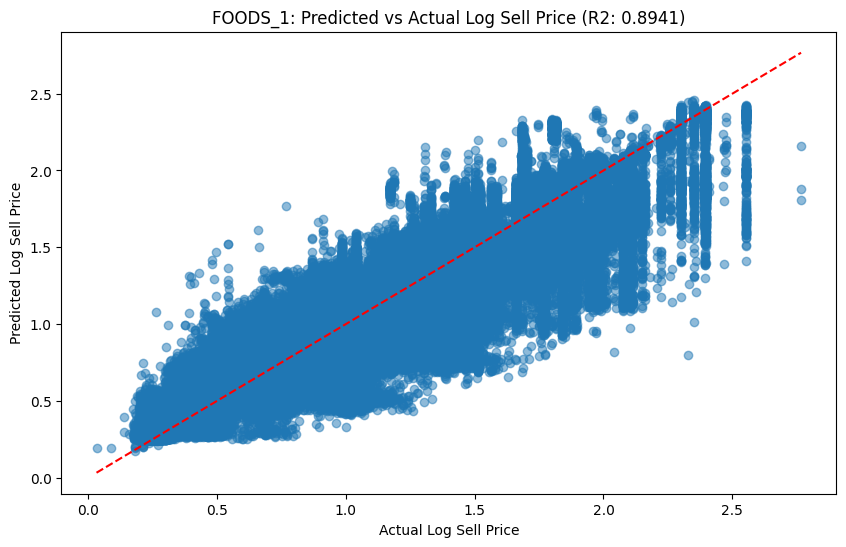

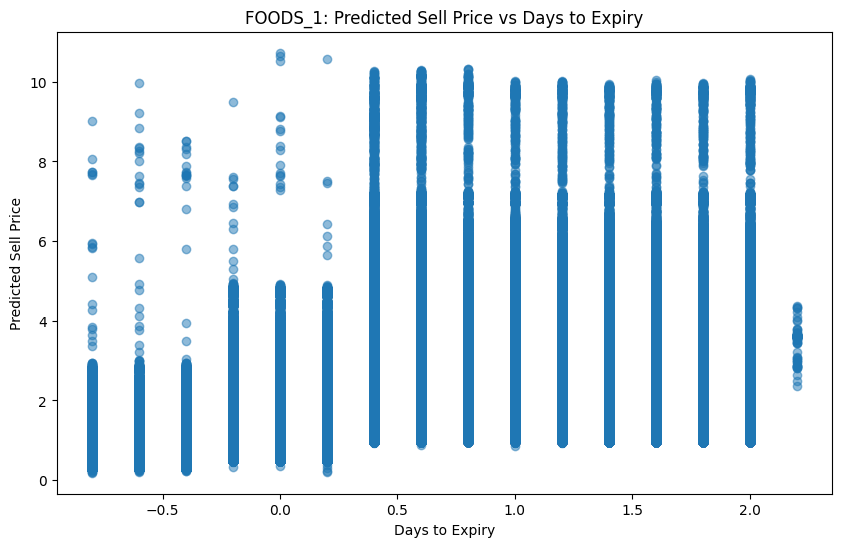

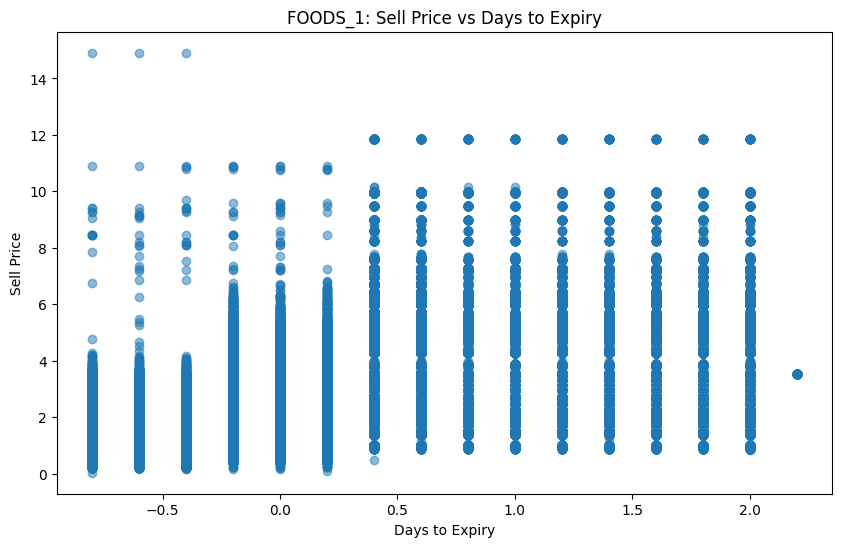

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pickle
import numpy as np
from sklearn.preprocessing import RobustScaler

# Define data types
dtypes = {
    'sales': 'int32', 'wm_yr_wk': 'int32', 'sell_price': 'float32', 'year': 'int32',
    'month': 'int32', 'day': 'int32', 'day_of_week': 'int32', 'days_to_expiry': 'int32',
    'price_lag_1': 'float32', 'price_diff': 'float32', 'price_trend': 'float32',
    'sales_lag_1': 'float32', 'sales_rolling_mean_7': 'float32', 'stock_turnover': 'float32',
    'price_elasticity': 'float32', 'has_event': 'int8', 'promo_impact': 'float32',
    'dept_FOODS_1': 'uint8', 'dept_FOODS_2': 'uint8', 'dept_FOODS_3': 'uint8',
    'store_CA_1': 'uint8', 'store_CA_2': 'uint8', 'store_CA_3': 'uint8', 'store_CA_4': 'uint8',
    'store_TX_1': 'uint8', 'store_TX_2': 'uint8', 'store_TX_3': 'uint8',
    'store_WI_1': 'uint8', 'store_WI_2': 'uint8', 'store_WI_3': 'uint8',
    'state_CA': 'uint8', 'state_TX': 'uint8', 'state_WI': 'uint8', 'week_of_year': 'int32',
    'days_since_first_sale': 'int32', 'days_to_expiry_squared': 'float32',
    'days_to_expiry_cubed': 'float32', 'expiry_price_elasticity': 'float32',
    'days_to_expiry_price_elasticity': 'float32', 'days_to_expiry_price_trend': 'float32',
    'log_sell_price': 'float32', 'log_days_to_expiry': 'float32', 'price_elasticity_trend_interaction': 'float32',
    'sell_price_lag_7': 'float32', 'days_to_expiry_sales_interaction': 'float32'
}

# Define features
features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
    'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event', 'promo_impact',
    'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1', 'stock_turnover',
    'expiry_price_elasticity', 'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
    'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction',
    'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'
]

# Load and process data for FOODS_1
dept_data = pd.concat([chunk[chunk['dept_FOODS_1'] == 1] for chunk in pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', chunksize=1000000, dtype=dtypes, parse_dates=['date'])])
dept_data = dept_data.sort_values('date')

# Define numerical features for scaling
numerical_features = [
    'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
    'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
    'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
    'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
    'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction'
]

# Load scaler and transform numerical features
scaler = pickle.load(open('scaler_FOODS_1.pkl', 'rb'))
dept_data[numerical_features] = scaler.transform(dept_data[numerical_features])

# Split data for testing
train_end_idx = int(len(dept_data) * 0.8)
X_test = dept_data[features].iloc[train_end_idx:]
y_test = dept_data['log_sell_price'].iloc[train_end_idx:]
y_test_sell_price = dept_data['sell_price'].iloc[train_end_idx:]

# Load model and make predictions
model = pickle.load(open('model_FOODS_1.pkl', 'rb'))
y_pred = model.predict(X_test)
y_pred_sell_price = np.expm1(y_pred)  # Convert log_sell_price predictions to sell_price

# Plot 1: Predicted vs Actual Log Sell Price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Log Sell Price')
plt.ylabel('Predicted Log Sell Price')
plt.title(f'FOODS_1: Predicted vs Actual Log Sell Price (R2: {r2_score(y_test, y_pred):.4f})')
plt.show()

# Plot 2: Predicted Sell Price vs Days to Expiry
plt.figure(figsize=(10, 6))
plt.scatter(dept_data['days_to_expiry'].iloc[train_end_idx:], y_pred_sell_price, alpha=0.5)
plt.xlabel('Days to Expiry')
plt.ylabel('Predicted Sell Price')
plt.title('FOODS_1: Predicted Sell Price vs Days to Expiry')
plt.show()

# Plot 3: Actual Sell Price vs Days to Expiry
plt.figure(figsize=(10, 6))
plt.scatter(dept_data['days_to_expiry'].iloc[train_end_idx:], y_test_sell_price, alpha=0.5)
plt.xlabel('Days to Expiry')
plt.ylabel('Sell Price')
plt.title('FOODS_1: Sell Price vs Days to Expiry')
plt.show()

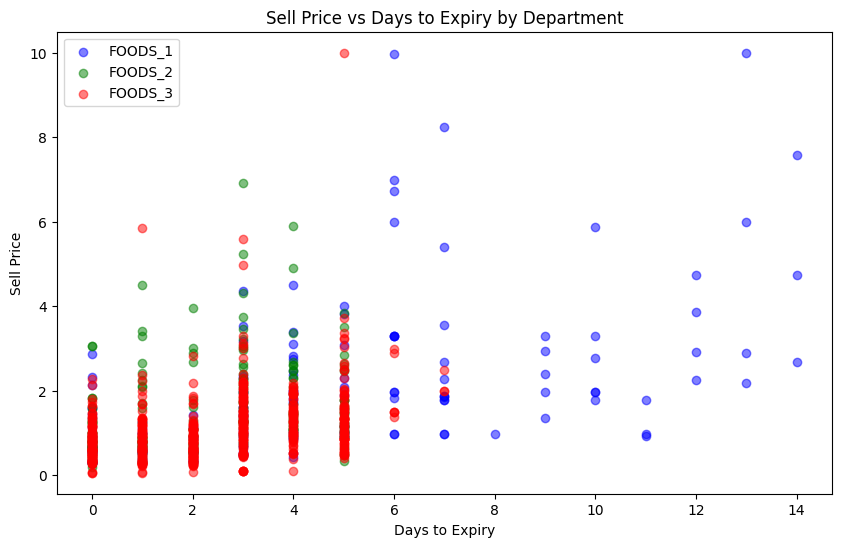

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', usecols=['sell_price', 'days_to_expiry', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'])
sample = data.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
for dept, color in [('FOODS_1', 'blue'), ('FOODS_2', 'green'), ('FOODS_3', 'red')]:
    dept_data = sample[sample[f'dept_{dept}'] == 1]
    plt.scatter(dept_data['days_to_expiry'], dept_data['sell_price'], alpha=0.5, label=dept, c=color)
plt.xlabel('Days to Expiry')
plt.ylabel('Sell Price')
plt.title('Sell Price vs Days to Expiry by Department')
plt.legend()
plt.show()

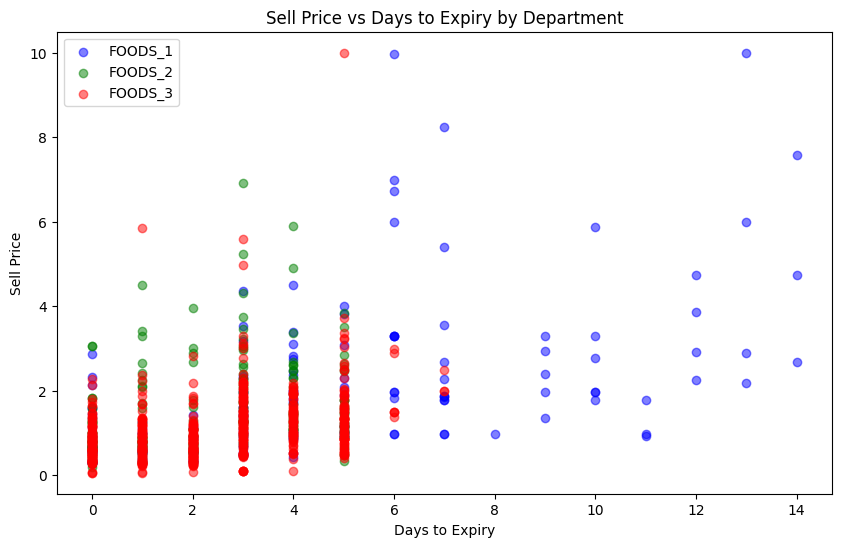

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', usecols=['sell_price', 'days_to_expiry', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'])
sample = data.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
for dept, color in [('FOODS_1', 'blue'), ('FOODS_2', 'green'), ('FOODS_3', 'red')]:
    dept_data = sample[sample[f'dept_{dept}'] == 1]
    plt.scatter(dept_data['days_to_expiry'], dept_data['sell_price'], alpha=0.5, label=dept, c=color)
plt.xlabel('Days to Expiry')
plt.ylabel('Sell Price')
plt.title('Sell Price vs Days to Expiry by Department')
plt.legend()
plt.show()

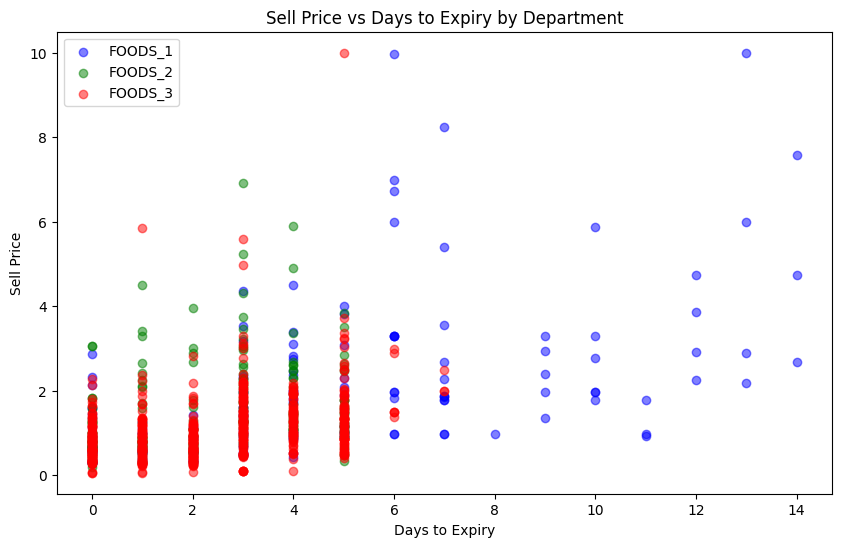

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', usecols=['sell_price', 'days_to_expiry', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'])
sample = data.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
for dept, color in [('FOODS_1', 'blue'), ('FOODS_2', 'green'), ('FOODS_3', 'red')]:
    dept_data = sample[sample[f'dept_{dept}'] == 1]
    plt.scatter(dept_data['days_to_expiry'], dept_data['sell_price'], alpha=0.5, label=dept, c=color)
plt.xlabel('Days to Expiry')
plt.ylabel('Sell Price')
plt.title('Sell Price vs Days to Expiry by Department')
plt.legend()
plt.show()

In [93]:
import pickle
scaler = pickle.load(open('scaler_FOODS_1.pkl', 'rb'))
print(scaler.feature_names_in_)

['days_to_expiry' 'days_to_expiry_squared' 'days_to_expiry_cubed'
 'log_days_to_expiry' 'days_since_first_sale' 'price_diff' 'price_trend'
 'price_elasticity' 'sales_lag_1' 'stock_turnover'
 'expiry_price_elasticity' 'days_to_expiry_price_elasticity'
 'days_to_expiry_price_trend' 'price_elasticity_trend_interaction'
 'sell_price_lag_7' 'days_to_expiry_sales_interaction']


In [96]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import RobustScaler

def predict_price(item_id, date, store_id, production_date):
    dept = 'FOODS_1' if item_id.startswith('FOODS_1') else 'FOODS_2' if item_id.startswith('FOODS_2') else 'FOODS_3'
    model = pickle.load(open(f'model_{dept}.pkl', 'rb'))
    scaler = pickle.load(open(f'scaler_{dept}.pkl', 'rb'))

    date = pd.to_datetime(date)
    production_date = pd.to_datetime(production_date)
    days_to_expiry = (date - production_date).days
    data = pd.DataFrame({
        'days_to_expiry': [days_to_expiry],
        'days_to_expiry_squared': [days_to_expiry ** 2],
        'days_to_expiry_cubed': [days_to_expiry ** 3],
        'log_days_to_expiry': [np.log1p(days_to_expiry)],
        'days_since_first_sale': [(date - pd.to_datetime('2011-01-29')).days],
        'day_of_week': [date.dayofweek],  # Added to match model's feature set
        'week_of_year': [date.isocalendar().week],  # Added to match model's feature set
        'month': [date.month],  # Added to match model's feature set
        'has_event': [0],  # Added to match model's feature set, assuming no event
        'promo_impact': [0.0],  # Added to match model's feature set, assuming no promotion
        'price_diff': [0.0],
        'price_trend': [0.0],
        'price_elasticity': [0.0],
        'sales_lag_1': [0.0],
        'stock_turnover': [0.0],
        'expiry_price_elasticity': [0.0],
        'days_to_expiry_price_elasticity': [0.0],
        'days_to_expiry_price_trend': [0.0],
        'price_elasticity_trend_interaction': [0.0],
        'sell_price_lag_7': [0.0],
        'days_to_expiry_sales_interaction': [0.0],
        'dept_FOODS_1': [1 if dept == 'FOODS_1' else 0],
        'dept_FOODS_2': [1 if dept == 'FOODS_2' else 0],
        'dept_FOODS_3': [1 if dept == 'FOODS_3' else 0]
    })

    for store in ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']:
        data[f'store_{store}'] = [1 if store == store_id else 0]

    # Features for scaling (match those fitted by RobustScaler)
    numerical_features = [
        'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
        'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
        'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
        'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
        'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction'
    ]
    data[numerical_features] = scaler.transform(data[numerical_features])

    # Features for prediction (match model's expected feature names and order)
    features = [
        'days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
        'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
        'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
        'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
        'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
        'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3'
    ]
    log_sell_price = model.predict(data[features])[0]
    return np.expm1(log_sell_price)

# Test predictions
print(predict_price('FOODS_1_001', '2025-07-10', 'CA_1', '2025-07-03'))  # Milk, 7 days
print(predict_price('FOODS_1_001', '2025-07-05', 'CA_1', '2025-07-03'))  # Milk, 2 days
print(predict_price('FOODS_3_003', '2025-07-06', 'CA_1', '2025-07-03'))  # Fish, 3 days
print(predict_price('FOODS_3_003', '2025-07-04', 'CA_1', '2025-07-03'))  # Fish, 1 day

1.5604372
0.30566895
0.29442236
0.09301358


In [97]:
import pandas as pd
data = pd.read_csv('corrected_encoded_m5_data.csv')
unique_item_ids = data['item_id'].unique()[:10]
print(unique_item_ids)

['FOODS_1_001' 'FOODS_1_005' 'FOODS_1_011' 'FOODS_1_013' 'FOODS_1_016'
 'FOODS_1_018' 'FOODS_1_019' 'FOODS_1_024' 'FOODS_1_032' 'FOODS_1_035']


In [1]:
import pandas as pd
data = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv')
print(data.columns.tolist())

['sales', 'date', 'wm_yr_wk', 'sell_price', 'year', 'month', 'day', 'day_of_week', 'days_to_expiry', 'price_lag_1', 'price_diff', 'price_trend', 'sales_lag_1', 'sales_rolling_mean_7', 'stock_turnover', 'price_elasticity', 'has_event', 'promo_impact', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3', 'store_CA_1', 'store_CA_2', 'store_CA_3', 'store_CA_4', 'store_TX_1', 'store_TX_2', 'store_TX_3', 'store_WI_1', 'store_WI_2', 'store_WI_3', 'state_CA', 'state_TX', 'state_WI', 'week_of_year', 'days_since_first_sale', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry', 'log_sell_price', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']


In [5]:
import pandas as pd

# Initialize an empty list to store sampled rows
sampled_rows = []

# Read the file in chunks and sample 20 rows
for chunk in pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', chunksize=10000):
    # Adjust usecols based on actual column names
    chunk = chunk[['date', 'days_to_expiry', 'sell_price', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']]
    if not chunk.empty:  # Check if chunk is not empty
        remaining = 20 - len(sampled_rows)
        if remaining > 0:
            n_to_sample = min(remaining, len(chunk))
            sampled_rows.append(chunk.sample(n=n_to_sample, random_state=42))

# Concatenate all sampled rows
sample = pd.concat(sampled_rows, ignore_index=True).head(20)

print(sample)

          date  days_to_expiry  sell_price  dept_FOODS_1  dept_FOODS_2  \
0   2011-01-30               2    1.633440             0             0   
1   2011-01-30               4    0.953454             0             0   
2   2011-01-29               0    0.715701             0             0   
3   2011-01-30               1    0.707813             1             0   
4   2011-01-30               2    1.428783             0             0   
5   2011-01-30               5    0.508434             0             0   
6   2011-01-29               7    8.880000             1             0   
7   2011-01-30               4    1.064701             0             0   
8   2011-01-30               1    0.435835             0             0   
9   2011-01-29               2    1.242098             0             0   
10  2011-01-29               2    1.199888             0             0   
11  2011-01-30               2    0.776610             0             1   
12  2011-01-30               6    3.97

In [6]:
import pandas as pd
data = pd.read_csv('corrected_encoded_m5_data.csv', usecols=['date'], parse_dates=['date'])
earliest_date = data['date'].min()
print(earliest_date)

2011-01-29 00:00:00


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read a manageable subset of the data
data = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', nrows=100000)
# Select relevant features and target
features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
            'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
            'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
            'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
            'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
            'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']
X = data[features]
y = data['sell_price']  # Assuming sell_price is the target
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (80000, 24) Test shape: (20000, 24)


In [8]:
X_test.to_csv('test_features.csv', index=False)
y_test.to_csv('test_targets.csv', index=False)

In [9]:
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the model (e.g., for FOODS_1)
model = pickle.load(open('model_FOODS_1.pkl', 'rb'))
scaler = pickle.load(open('scaler_FOODS_1.pkl', 'rb'))

# Load test data
X_test = pd.read_csv('test_features.csv')
y_test = pd.read_csv('test_targets.csv')['sell_price']

# Scale test features
numerical_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                     'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
                     'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
                     'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
                     'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Predict and evaluate
y_pred = model.predict(X_test[features])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

RMSE: 0.9395, MAE: 0.5313


In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Added import

# Load and prepare data (use a subset)
data = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', nrows=100000)
features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
            'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
            'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
            'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
            'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
            'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']
X = data[features]
y = data['sell_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = RobustScaler()
numerical_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                     'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
                     'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
                     'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
                     'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Define model and expanded parameter grid
model = xgb.XGBRegressor(objective='reg:squarederror')
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

# Save the optimized model and scaler
with open('model_FOODS_1_optimized.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler_FOODS_1_optimized.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Evaluate on test set
y_pred = best_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}, Test MAE: {mae:.4f}")

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 1.0}
Best RMSE: 0.40778402302338973
Test RMSE: 0.3898, Test MAE: 0.2029


In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare data
data = pd.read_csv('corrected_item_mapped_expiry_m5_data_v8.csv', nrows=100000)

# Define departments
departments = ['FOODS_1', 'FOODS_2', 'FOODS_3']
all_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
                'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
                'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
                'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
                'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']
numerical_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                     'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
                     'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
                     'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
                     'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']

for dept in departments:
    # Filter data for the current department
    dept_col = f'dept_{dept}'
    dept_data = data[data[dept_col] == 1].copy()

    if dept_data.empty:
        print(f"No data found for {dept}. Skipping...")
        continue

    X = dept_data[all_features]
    y = dept_data['sell_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = RobustScaler()
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])

    # Define model and parameter grid
    model = xgb.XGBRegressor(objective='reg:squarederror')
    param_grid = {
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 200, 300, 400],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train[all_features], y_train)

    # Best model
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {dept}:", grid_search.best_params_)
    print(f"Best RMSE for {dept}:", np.sqrt(-grid_search.best_score_))

    # Save the optimized model and scaler
    with open(f'model_{dept}_optimized.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    with open(f'scaler_{dept}_optimized.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # Evaluate on test set
    y_pred = best_model.predict(X_test[all_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Test RMSE for {dept}: {rmse:.4f}, Test MAE for {dept}: {mae:.4f}")

Best parameters for FOODS_1: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.8}
Best RMSE for FOODS_1: 0.5258643705217309
Test RMSE for FOODS_1: 0.4944, Test MAE for FOODS_1: 0.2487
Best parameters for FOODS_2: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best RMSE for FOODS_2: 0.311896530718748
Test RMSE for FOODS_2: 0.3248, Test MAE for FOODS_2: 0.1870
Best parameters for FOODS_3: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Best RMSE for FOODS_3: 0.3439485742933584
Test RMSE for FOODS_3: 0.3415, Test MAE for FOODS_3: 0.1718


In [7]:
import pandas as pd
import numpy as np
import pickle

def predict_price(item_id, date, store_id, production_date, promo_impact=0.0, sales_lag_1=0.0):
    dept = 'FOODS_1' if item_id.startswith('FOODS_1') else 'FOODS_2' if item_id.startswith('FOODS_2') else 'FOODS_3'
    model = pickle.load(open(f'model_{dept}_optimized.pkl', 'rb'))
    scaler = pickle.load(open(f'scaler_{dept}_optimized.pkl', 'rb'))

    date = pd.to_datetime(date)
    production_date = pd.to_datetime(production_date)
    days_to_expiry = (date - production_date).days
    data = pd.DataFrame({
        'days_to_expiry': [days_to_expiry],
        'days_to_expiry_squared': [days_to_expiry ** 2],
        'days_to_expiry_cubed': [days_to_expiry ** 3],
        'log_days_to_expiry': [np.log1p(days_to_expiry)],
        'days_since_first_sale': [(date - pd.to_datetime('2011-01-29')).days],
        'day_of_week': [date.dayofweek],
        'week_of_year': [date.isocalendar().week],
        'month': [date.month],
        'has_event': [0],
        'promo_impact': [promo_impact],
        'price_diff': [0.0],
        'price_trend': [0.0],
        'price_elasticity': [0.0],
        'sales_lag_1': [sales_lag_1],
        'stock_turnover': [0.0],
        'expiry_price_elasticity': [0.0],
        'days_to_expiry_price_elasticity': [0.0],
        'days_to_expiry_price_trend': [0.0],
        'price_elasticity_trend_interaction': [0.0],
        'sell_price_lag_7': [0.0],
        'days_to_expiry_sales_interaction': [0.0],
        'dept_FOODS_1': [1 if dept == 'FOODS_1' else 0],
        'dept_FOODS_2': [1 if dept == 'FOODS_2' else 0],
        'dept_FOODS_3': [1 if dept == 'FOODS_3' else 0]
    })

    for store in ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']:
        data[f'store_{store}'] = [1 if store == store_id else 0]

    numerical_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                         'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
                         'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
                         'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
                         'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']
    data[numerical_features] = scaler.transform(data[numerical_features])

    features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
                'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
                'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
                'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
                'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']
    log_sell_price = model.predict(data[features])[0]
    return np.expm1(log_sell_price)

# Test predictions
print("Milk 7 days:", predict_price('FOODS_1_001', '2025-07-10', 'CA_1', '2025-07-03', promo_impact=0.3, sales_lag_1=5.0))
print("Fish 3 days:", predict_price('FOODS_3_003', '2025-07-06', 'CA_1', '2025-07-03', promo_impact=0.1, sales_lag_1=2.0))

Milk 7 days: 1.6775672
Fish 3 days: 0.2417381


In [3]:
import pandas as pd
import numpy as np
import pickle

# Define the predict_price function
def predict_price(item_id, date, store_id, production_date, promo_impact=0.0, sales_lag_1=0.0):
    dept = 'FOODS_1' if item_id.startswith('FOODS_1') else 'FOODS_2' if item_id.startswith('FOODS_2') else 'FOODS_3'
    model = pickle.load(open(f'model_{dept}_optimized.pkl', 'rb'))
    scaler = pickle.load(open(f'scaler_{dept}_optimized.pkl', 'rb'))

    date = pd.to_datetime(date)
    production_date = pd.to_datetime(production_date)
    days_to_expiry = (date - production_date).days
    data = pd.DataFrame({
        'days_to_expiry': [days_to_expiry],
        'days_to_expiry_squared': [days_to_expiry ** 2],
        'days_to_expiry_cubed': [days_to_expiry ** 3],
        'log_days_to_expiry': [np.log1p(days_to_expiry)],
        'days_since_first_sale': [(date - pd.to_datetime('2011-01-29')).days],
        'day_of_week': [date.dayofweek],
        'week_of_year': [date.isocalendar().week],
        'month': [date.month],
        'has_event': [0],
        'promo_impact': [promo_impact],
        'price_diff': [0.0],
        'price_trend': [0.0],
        'price_elasticity': [0.0],
        'sales_lag_1': [sales_lag_1],
        'stock_turnover': [0.0],
        'expiry_price_elasticity': [0.0],
        'days_to_expiry_price_elasticity': [0.0],
        'days_to_expiry_price_trend': [0.0],
        'price_elasticity_trend_interaction': [0.0],
        'sell_price_lag_7': [0.0],
        'days_to_expiry_sales_interaction': [0.0],
        'dept_FOODS_1': [1 if dept == 'FOODS_1' else 0],
        'dept_FOODS_2': [1 if dept == 'FOODS_2' else 0],
        'dept_FOODS_3': [1 if dept == 'FOODS_3' else 0]
    })

    for store in ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']:
        data[f'store_{store}'] = [1 if store == store_id else 0]

    numerical_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                         'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
                         'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
                         'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
                         'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']
    data[numerical_features] = scaler.transform(data[numerical_features])

    features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
                'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
                'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
                'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
                'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']
    log_sell_price = model.predict(data[features])[0]
    return np.expm1(log_sell_price)

# Test cases with INR conversion
test_cases = [
    ('FOODS_1_001', '2025-07-10', 'CA_1', '2025-07-03', 0.0, 0.0),  # Baseline
    ('FOODS_3_003', '2025-07-06', 'TX_1', '2025-07-03', 0.0, 0.0),  # Short expiry
    ('FOODS_1_001', '2025-07-08', 'WI_1', '2025-07-03', 0.5, 10.0),  # Promotional
    ('FOODS_3_003', '2025-07-04', 'CA_2', '2025-07-03', 0.0, 0.0),  # Edge case
    ('FOODS_2_002', '2025-07-17', 'TX_2', '2025-07-03', 0.1, 5.0)   # Cross-department
]

for item_id, date, store_id, production_date, promo_impact, sales_lag_1 in test_cases:
    prediction_usd = predict_price(item_id, date, store_id, production_date, promo_impact, sales_lag_1)
    prediction_inr = prediction_usd * 85
    print(f"{item_id} ({(pd.to_datetime(date) - pd.to_datetime(production_date)).days} days): {prediction_usd:.7f} USD, {prediction_inr:.2f} INR")

FOODS_1_001 (7 days): 1.8578894 USD, 157.92 INR
FOODS_3_003 (3 days): 0.2335754 USD, 19.85 INR
FOODS_1_001 (5 days): 0.9771384 USD, 83.06 INR
FOODS_3_003 (1 days): 0.1503407 USD, 12.78 INR
FOODS_2_002 (14 days): 0.5630410 USD, 47.86 INR


In [6]:
import pandas as pd
import numpy as np
import pickle

# Define the predict_price function with initial price input
def predict_price(item_id, date, store_id, production_date, promo_impact=0.0, sales_lag_1=0.0, initial_price=0.0):
    dept = 'FOODS_1' if item_id.startswith('FOODS_1') else 'FOODS_2' if item_id.startswith('FOODS_2') else 'FOODS_3'
    model = pickle.load(open(f'model_{dept}_optimized.pkl', 'rb'))
    scaler = pickle.load(open(f'scaler_{dept}_optimized.pkl', 'rb'))

    date = pd.to_datetime(date)
    production_date = pd.to_datetime(production_date)
    days_to_expiry = (date - production_date).days
    reference_days = 14  # Reference point for initial price (e.g., 14 days shelf life)

    # Construct feature vector for current days_to_expiry
    data_current = pd.DataFrame({
        'days_to_expiry': [days_to_expiry],
        'days_to_expiry_squared': [days_to_expiry ** 2],
        'days_to_expiry_cubed': [days_to_expiry ** 3],
        'log_days_to_expiry': [np.log1p(days_to_expiry)],
        'days_since_first_sale': [(date - pd.to_datetime('2011-01-29')).days],
        'day_of_week': [date.dayofweek],
        'week_of_year': [date.isocalendar().week],
        'month': [date.month],
        'has_event': [0],
        'promo_impact': [promo_impact],
        'price_diff': [0.0],
        'price_trend': [0.0],
        'price_elasticity': [0.0],
        'sales_lag_1': [sales_lag_1],
        'stock_turnover': [0.0],
        'expiry_price_elasticity': [0.0],
        'days_to_expiry_price_elasticity': [0.0],
        'days_to_expiry_price_trend': [0.0],
        'price_elasticity_trend_interaction': [0.0],
        'sell_price_lag_7': [0.0],
        'days_to_expiry_sales_interaction': [0.0],
        'dept_FOODS_1': [1 if dept == 'FOODS_1' else 0],
        'dept_FOODS_2': [1 if dept == 'FOODS_2' else 0],
        'dept_FOODS_3': [1 if dept == 'FOODS_3' else 0]
    })

    for store in ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']:
        data_current[f'store_{store}'] = [1 if store == store_id else 0]

    numerical_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                         'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
                         'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
                         'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
                         'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']
    data_current[numerical_features] = scaler.transform(data_current[numerical_features])

    features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
                'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
                'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
                'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
                'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']
    log_sell_price_current = model.predict(data_current[features])[0]
    predicted_price_current = np.expm1(log_sell_price_current)

    # Construct feature vector for reference days_to_expiry
    if days_to_expiry >= reference_days:
        return initial_price  # No adjustment if expiry is beyond reference
    data_reference = pd.DataFrame({
        'days_to_expiry': [reference_days],
        'days_to_expiry_squared': [reference_days ** 2],
        'days_to_expiry_cubed': [reference_days ** 3],
        'log_days_to_expiry': [np.log1p(reference_days)],
        'days_since_first_sale': [(date - pd.to_datetime('2011-01-29')).days],
        'day_of_week': [date.dayofweek],
        'week_of_year': [date.isocalendar().week],
        'month': [date.month],
        'has_event': [0],
        'promo_impact': [promo_impact],
        'price_diff': [0.0],
        'price_trend': [0.0],
        'price_elasticity': [0.0],
        'sales_lag_1': [sales_lag_1],
        'stock_turnover': [0.0],
        'expiry_price_elasticity': [0.0],
        'days_to_expiry_price_elasticity': [0.0],
        'days_to_expiry_price_trend': [0.0],
        'price_elasticity_trend_interaction': [0.0],
        'sell_price_lag_7': [0.0],
        'days_to_expiry_sales_interaction': [0.0],
        'dept_FOODS_1': [1 if dept == 'FOODS_1' else 0],
        'dept_FOODS_2': [1 if dept == 'FOODS_2' else 0],
        'dept_FOODS_3': [1 if dept == 'FOODS_3' else 0]
    })

    for store in ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']:
        data_reference[f'store_{store}'] = [1 if store == store_id else 0]

    data_reference[numerical_features] = scaler.transform(data_reference[numerical_features])
    log_sell_price_reference = model.predict(data_reference[features])[0]
    predicted_price_reference = np.expm1(log_sell_price_reference)

    # Adjust initial price based on the ratio of predicted prices
    if predicted_price_reference > 0:
        adjustment_factor = predicted_price_current / predicted_price_reference
        final_price = initial_price * adjustment_factor
    else:
        final_price = initial_price  # Fallback if reference price is invalid

    return final_price

# Example usage
print("Milk 7 days with initial price 2.0 USD:", predict_price('FOODS_1_001', '2025-07-10', 'CA_1', '2025-07-03', 0.3, 5.0, 9.0))
print("Fish 3 days with initial price 0.5 USD:", predict_price('FOODS_3_003', '2025-07-06', 'CA_1', '2025-07-03', 0.1, 2.0, 0.5))

Milk 7 days with initial price 2.0 USD: 5.2413044
Fish 3 days with initial price 0.5 USD: 0.04234716


In [9]:
test_cases = [
    ('FOODS_1_001', '2025-07-10', 'CA_1', '2025-07-03', 0.3, 5.0, 2.0),  # Milk
    ('FOODS_3_003', '2025-07-06', 'CA_1', '2025-07-03', 0.1, 2.0, 0.5),  # Fish
    ('FOODS_2_002', '2025-07-17', 'TX_2', '2025-07-03', 0.1, 5.0, 1.0)   # Hypothetical
]

for item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price in test_cases:
    prediction = predict_price(item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price)
    prediction_inr = prediction * 85
    print(f"{item_id} ({(pd.to_datetime(date) - pd.to_datetime(production_date)).days} days): {prediction:.7f} USD, {prediction_inr:.2f} INR")

FOODS_1_001 (7 days): 1.1647344 USD, 99.00 INR
FOODS_3_003 (3 days): 0.0423472 USD, 3.60 INR
FOODS_2_002 (14 days): 1.0000000 USD, 85.00 INR


In [10]:
test_cases_extended = [
    ('FOODS_1_001', '2025-07-08', 'CA_1', '2025-07-03', 0.3, 5.0, 2.0),  # 5 days
    ('FOODS_3_003', '2025-07-04', 'CA_1', '2025-07-03', 0.1, 2.0, 0.5),  # 1 day
    ('FOODS_2_002', '2025-07-10', 'TX_2', '2025-07-03', 0.1, 5.0, 1.0)   # 7 days
]

for item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price in test_cases_extended:
    prediction = predict_price(item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price)
    prediction_inr = prediction * 85
    print(f"{item_id} ({(pd.to_datetime(date) - pd.to_datetime(production_date)).days} days): {prediction:.7f} USD, {prediction_inr:.2f} INR")

FOODS_1_001 (5 days): 0.5671914 USD, 48.21 INR
FOODS_3_003 (1 days): 0.0253871 USD, 2.16 INR
FOODS_2_002 (7 days): 1.0000000 USD, 85.00 INR


In [11]:
test_case_additional = [
    ('FOODS_1_001', '2025-07-07', 'CA_1', '2025-07-03', 0.3, 5.0, 2.0),  # 4 days
    ('FOODS_3_003', '2025-07-05', 'CA_1', '2025-07-03', 0.1, 2.0, 0.5),  # 2 days
    ('FOODS_2_002', '2025-07-03', 'TX_2', '2025-07-03', 0.1, 5.0, 1.0)   # 0 days
]

for item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price in test_case_additional:
    prediction = predict_price(item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price)
    prediction_inr = prediction * 85
    print(f"{item_id} ({(pd.to_datetime(date) - pd.to_datetime(production_date)).days} days): {prediction:.7f} USD, {prediction_inr:.2f} INR")

FOODS_1_001 (4 days): 0.4795846 USD, 40.76 INR
FOODS_3_003 (2 days): 0.0255037 USD, 2.17 INR
FOODS_2_002 (0 days): 0.8100024 USD, 68.85 INR


In [1]:
test_case_additional = [
    ('FOODS_1_001', '2025-07-07', 'CA_1', '2025-07-03', 0.3, 5.0, 2.0),  # 4 days
    ('FOODS_3_003', '2025-07-05', 'CA_1', '2025-07-03', 0.1, 2.0, 0.5),  # 2 days
    ('FOODS_2_002', '2025-07-03', 'TX_2', '2025-07-03', 0.1, 5.0, 1.0)   # 0 days
]

for item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price in test_case_additional:
    prediction = predict_price(item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price)
    prediction_inr = prediction * 85
    print(f"{item_id} ({(pd.to_datetime(date) - pd.to_datetime(production_date)).days} days): {prediction:.7f} USD, {prediction_inr:.2f} INR")

NameError: name 'predict_price' is not defined

In [2]:
import pandas as pd
import numpy as np
import pickle

# Define the predict_price function with initial price input
def predict_price(item_id, date, store_id, production_date, promo_impact=0.0, sales_lag_1=0.0, initial_price=0.0):
    dept = 'FOODS_1' if item_id.startswith('FOODS_1') else 'FOODS_2' if item_id.startswith('FOODS_2') else 'FOODS_3'
    model = pickle.load(open(f'model_{dept}_optimized.pkl', 'rb'))
    scaler = pickle.load(open(f'scaler_{dept}_optimized.pkl', 'rb'))

    date = pd.to_datetime(date)
    production_date = pd.to_datetime(production_date)
    days_to_expiry = (date - production_date).days
    reference_days = 14  # Reference point for initial price (e.g., 14 days shelf life)

    # Construct feature vector for current days_to_expiry
    data_current = pd.DataFrame({
        'days_to_expiry': [days_to_expiry],
        'days_to_expiry_squared': [days_to_expiry ** 2],
        'days_to_expiry_cubed': [days_to_expiry ** 3],
        'log_days_to_expiry': [np.log1p(days_to_expiry)],
        'days_since_first_sale': [(date - pd.to_datetime('2011-01-29')).days],
        'day_of_week': [date.dayofweek],
        'week_of_year': [date.isocalendar().week],
        'month': [date.month],
        'has_event': [0],
        'promo_impact': [promo_impact],
        'price_diff': [0.0],
        'price_trend': [0.0],
        'price_elasticity': [0.0],
        'sales_lag_1': [sales_lag_1],
        'stock_turnover': [0.0],
        'expiry_price_elasticity': [0.0],
        'days_to_expiry_price_elasticity': [0.0],
        'days_to_expiry_price_trend': [0.0],
        'price_elasticity_trend_interaction': [0.0],
        'sell_price_lag_7': [0.0],
        'days_to_expiry_sales_interaction': [0.0],
        'dept_FOODS_1': [1 if dept == 'FOODS_1' else 0],
        'dept_FOODS_2': [1 if dept == 'FOODS_2' else 0],
        'dept_FOODS_3': [1 if dept == 'FOODS_3' else 0]
    })

    for store in ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']:
        data_current[f'store_{store}'] = [1 if store == store_id else 0]

    numerical_features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                         'days_since_first_sale', 'price_diff', 'price_trend', 'price_elasticity',
                         'sales_lag_1', 'stock_turnover', 'expiry_price_elasticity',
                         'days_to_expiry_price_elasticity', 'days_to_expiry_price_trend',
                         'price_elasticity_trend_interaction', 'sell_price_lag_7', 'days_to_expiry_sales_interaction']
    data_current[numerical_features] = scaler.transform(data_current[numerical_features])

    features = ['days_to_expiry', 'days_to_expiry_squared', 'days_to_expiry_cubed', 'log_days_to_expiry',
                'days_since_first_sale', 'day_of_week', 'week_of_year', 'month', 'has_event',
                'promo_impact', 'price_diff', 'price_trend', 'price_elasticity', 'sales_lag_1',
                'stock_turnover', 'expiry_price_elasticity', 'days_to_expiry_price_elasticity',
                'days_to_expiry_price_trend', 'price_elasticity_trend_interaction', 'sell_price_lag_7',
                'days_to_expiry_sales_interaction', 'dept_FOODS_1', 'dept_FOODS_2', 'dept_FOODS_3']
    log_sell_price_current = model.predict(data_current[features])[0]
    predicted_price_current = np.expm1(log_sell_price_current)

    # Construct feature vector for reference days_to_expiry
    if days_to_expiry >= reference_days:
        return initial_price  # No adjustment if expiry is beyond reference
    data_reference = pd.DataFrame({
        'days_to_expiry': [reference_days],
        'days_to_expiry_squared': [reference_days ** 2],
        'days_to_expiry_cubed': [reference_days ** 3],
        'log_days_to_expiry': [np.log1p(reference_days)],
        'days_since_first_sale': [(date - pd.to_datetime('2011-01-29')).days],
        'day_of_week': [date.dayofweek],
        'week_of_year': [date.isocalendar().week],
        'month': [date.month],
        'has_event': [0],
        'promo_impact': [promo_impact],
        'price_diff': [0.0],
        'price_trend': [0.0],
        'price_elasticity': [0.0],
        'sales_lag_1': [sales_lag_1],
        'stock_turnover': [0.0],
        'expiry_price_elasticity': [0.0],
        'days_to_expiry_price_elasticity': [0.0],
        'days_to_expiry_price_trend': [0.0],
        'price_elasticity_trend_interaction': [0.0],
        'sell_price_lag_7': [0.0],
        'days_to_expiry_sales_interaction': [0.0],
        'dept_FOODS_1': [1 if dept == 'FOODS_1' else 0],
        'dept_FOODS_2': [1 if dept == 'FOODS_2' else 0],
        'dept_FOODS_3': [1 if dept == 'FOODS_3' else 0]
    })

    for store in ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']:
        data_reference[f'store_{store}'] = [1 if store == store_id else 0]

    data_reference[numerical_features] = scaler.transform(data_reference[numerical_features])
    log_sell_price_reference = model.predict(data_reference[features])[0]
    predicted_price_reference = np.expm1(log_sell_price_reference)

    # Adjust initial price based on the ratio of predicted prices
    if predicted_price_reference > 0:
        adjustment_factor = predicted_price_current / predicted_price_reference
        final_price = initial_price * adjustment_factor
    else:
        final_price = initial_price  # Fallback if reference price is invalid

    return final_price

# Example usage
print("Milk 7 days with initial price 2.0 USD:", predict_price('FOODS_1_001', '2025-07-10', 'CA_1', '2025-07-03', 0.3, 5.0, 9.0))
print("Fish 3 days with initial price 0.5 USD:", predict_price('FOODS_3_003', '2025-07-06', 'CA_1', '2025-07-03', 0.1, 2.0, 0.5))

FileNotFoundError: [Errno 2] No such file or directory: 'model_FOODS_1_optimized.pkl'

In [3]:
test_cases_extended = [
    ('FOODS_1_001', '2025-07-08', 'CA_1', '2025-07-03', 0.3, 5.0, 2.0),  # 5 days
    ('FOODS_3_003', '2025-07-04', 'CA_1', '2025-07-03', 0.1, 2.0, 0.5),  # 1 day
    ('FOODS_2_002', '2025-07-10', 'TX_2', '2025-07-03', 0.1, 5.0, 1.0)   # 7 days
]

for item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price in test_cases_extended:
    prediction = predict_price(item_id, date, store_id, production_date, promo_impact, sales_lag_1, initial_price)
    prediction_inr = prediction * 85
    print(f"{item_id} ({(pd.to_datetime(date) - pd.to_datetime(production_date)).days} days): {prediction:.7f} USD, {prediction_inr:.2f} INR")

FileNotFoundError: [Errno 2] No such file or directory: 'model_FOODS_1_optimized.pkl'